In [2]:
plt.style.use('ncr-paper.mplstyle')

# Phase definition

In [3]:
def plot_phase_divide():
    # maximum abundance for the neutral gas
    xe_cut = 0.1
    xH2_cut = 0.25
    # maximum temperature for each thermal phase
    Tc = 500
    Tu = 5000
    Tw = 3.5e4
    plt.axvline(Tc,ls='--',color='b')
    plt.axvline(Tu,ls='--',color='b')
    plt.axvline(Tw,ls='--',color='b')
    plt.axhline(1-xe_cut,ls='--',color='r',xmax=(np.log10(Tw)-1)/4)
    plt.axhline(xe_cut,ls='--',color='r',xmax=(np.log10(Tw)-1)/4)
    plt.xlim(10,1.e5)
    plt.ylim(0,1.2)
    for phase, T_ in zip(['Cold','Unstable','Warm'],[Tc,Tu,Tw]):
        for species, xe_ in zip(['Neutral','Partially Ionized','Ionized'],[0, xe_cut*5, 1-xe_cut]):
            plt.annotate(f'{phase} \n{species}',(T_,xe_),
                        ha='right',va='bottom',fontsize=5)
    plt.xscale('log')
    plt.xlabel(r'$T\,[{\rm K}]$')
    plt.ylabel(r'$x_e$')

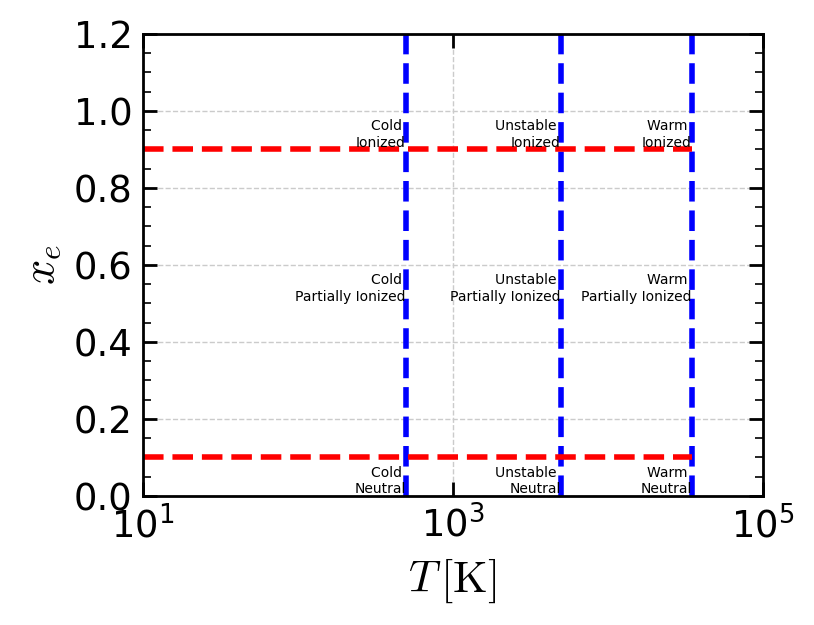

In [4]:
plt.figure(figsize=(4,3))
plot_phase_divide()
plt.savefig('CII_figures/phase.png')

# Theoretical Predictions

In [5]:
from labellines import labelLine, labelLines

def beta_ul(T):
    return 2*np.exp(-91.2/T)

def ncrit(T, xe):
    Aul = 2.4e-6
    # Eqs (17.16) and (17.17) in Draine (2011)
    T2 = T * 1e-2
    k10e = 4.53e-8 * np.sqrt(1.0e4 / T)
    ncrit_e = Aul/k10e

    # Omega10e = (1.55+1.25*T*1e-4)/(1 + 0.35*(T*1e-4)**1.25)
    # k10e = 8.629e-8/np.sqrt(T*1e-4)*Omega10e

    k10HI = 7.58e-10 * np.power(T2, 0.1281 + 0.0087 * np.log(T2))
    ncrit_HI = Aul/k10HI
    return xe/ncrit_e + (1-xe)/ncrit_HI

def get_n_from_nLambda(nLambda, T, xe=0, Z=1):
    xCplus = 1.6e-4*Z
    Aul = 2.4e-6
    Eul = 1.26e-14
    density = nLambda/(ncrit(T,xe))/(xCplus*beta_ul(T)*Aul*Eul-nLambda*(beta_ul(T)+1))
    return density

def get_nLambda_crit(T,Z=1):
    xCplus = 1.6e-4*Z
    Aul = 2.4e-6
    Eul = 1.26e-14
    nLcrit = Z*xCplus*beta_ul(T)*Aul*Eul/(beta_ul(T)+1)
    nLcrit_asym = Z*xCplus*Aul*Eul*2/3.
    return nLcrit, nLcrit_asym

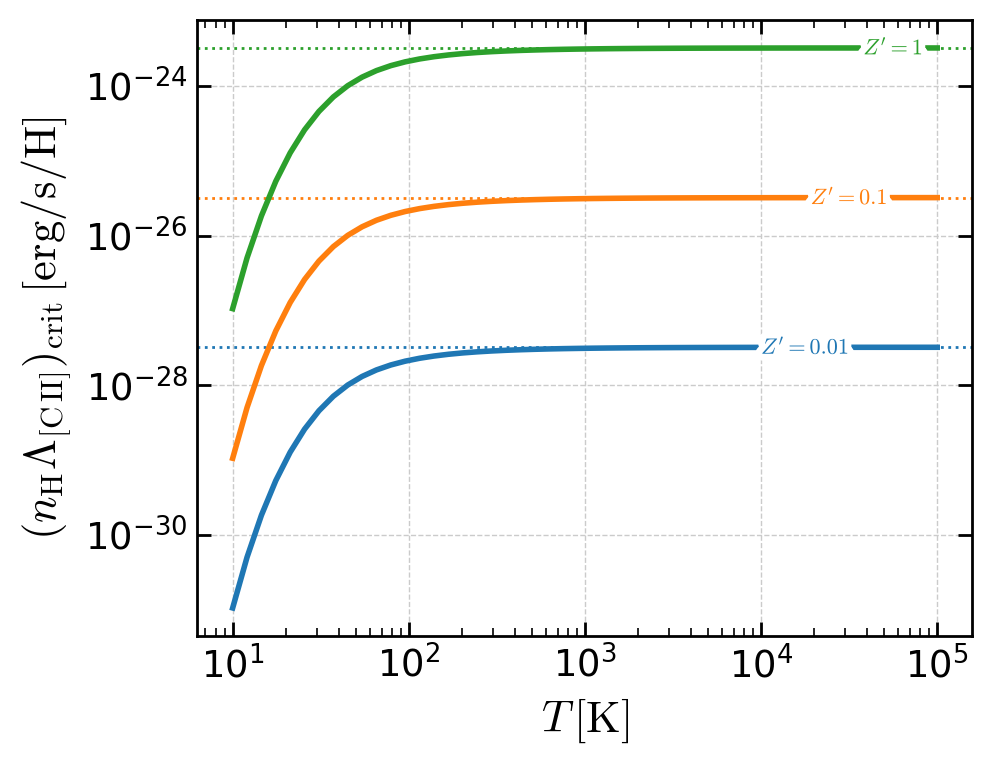

In [6]:
plt.figure(figsize=(5,4))
for Z in [0.01,0.1,1]:
    T = np.logspace(1,5)
    nLcrit, nLcrit_asym = get_nLambda_crit(T,Z=Z)

    l,=plt.loglog(T,nLcrit,label=f'$Z^\prime={Z}$')
    plt.axhline(nLcrit_asym,ls=':',color=l.get_color(),lw=1)#,label=f'{nLcrit_asym:4.2e}')
    plt.ylabel(r'$(n_{\rm H} \Lambda_{[{\rm C\,II}]})_{\rm crit}\,[{\rm erg/s/H}]$')
    plt.xlabel(r'$T\,[{\rm K}]$')

labelLines(plt.gca().get_lines()[::2], xvals=(1.e4,1.e5), zorder=2.5,fontsize=8)
plt.savefig('CII_figures/nLambda_crit.png')

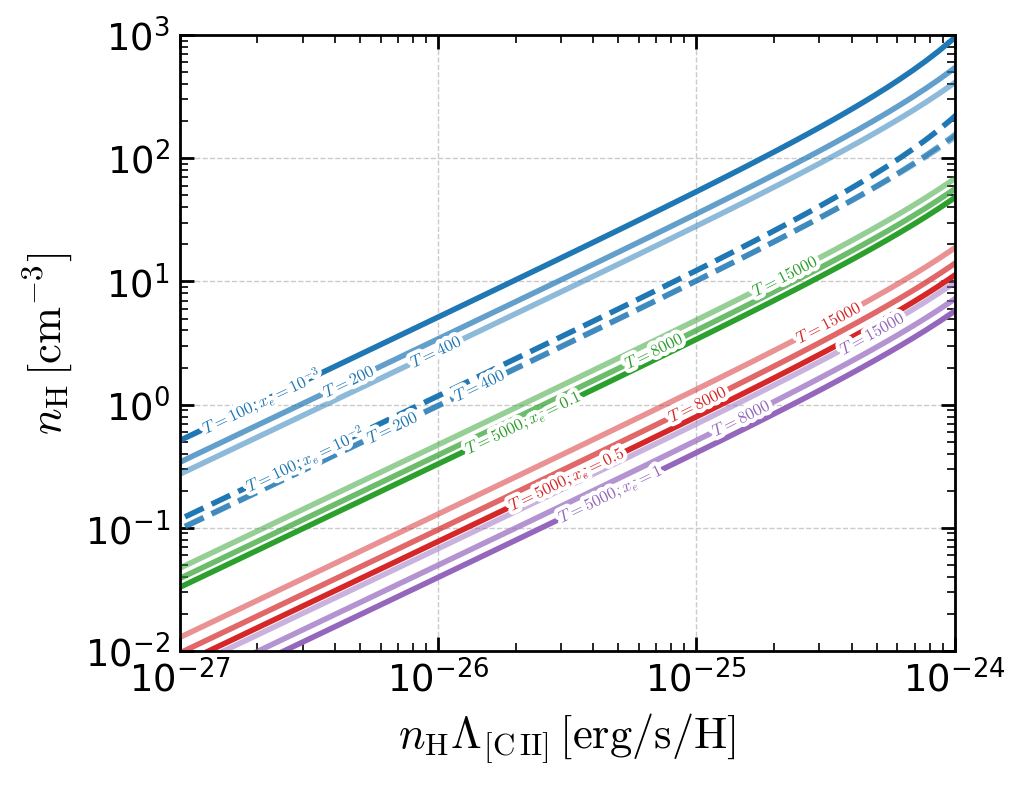

In [7]:
def add_nLambda_n(**kwargs):
    nLambda = np.logspace(-28,-23,100)
    x = nLambda
    for T_,alpha_ in zip([100,200,400],[1,0.7,0.5]):
        y = get_n_from_nLambda(nLambda, T_, xe = 1.e-3)
        plt.plot(x[y>0],y[y>0],
                color='C0', alpha=alpha_,
                label=f'$T={T_}, x_e=10^{{-3}}$' if T_== 100 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 1.e-2)
        plt.plot(x[y>0],y[y>0],
                color='C0', alpha=alpha_, ls = '--',
                label=f'$T={T_}, x_e=10^{{-2}}$' if T_== 100 else f'$T={T_}$',
                **kwargs)
        # plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
        #          color='C0', ls=':', alpha=alpha_)

    # for T_ in [1000,3000,5000]:
    #     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
    #     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
    #              color='C1', ls=':')

    for T_,alpha_ in zip([5000,8000,15000],[1,0.7,0.5]):
        y = get_n_from_nLambda(nLambda, T_, xe = 0.1)
        plt.plot(x[y>0],y[y>0],
                color='C2', alpha=alpha_,
                label=f'$T={T_}, x_e=0.1$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 0.5)
        plt.plot(x[y>0],y[y>0],
                color='C3', alpha=alpha_,
                label=f'$T={T_}, x_e=0.5$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 1.)
        plt.plot(x[y>0],y[y>0],
                color='C4', alpha=alpha_,
                label=f'$T={T_}, x_e=1$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
plt.figure(figsize=(5,4))
add_nLambda_n()
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.ylim(1.e-2,1.e3)
plt.xlim(1.e-27,1.e-24)
plt.xlabel(r'$n_{\rm H} \Lambda_{[{\rm C\,II}]}\,[{\rm erg/s/H}]$')
plt.ylabel(r'$n_{\rm H}\,[{\rm cm^{-3}}]$')

labelLines(plt.gca().get_lines(), zorder=2.5,fontsize=6, outline_width=3)
plt.savefig('CII_figures/nLamdba_n.png')

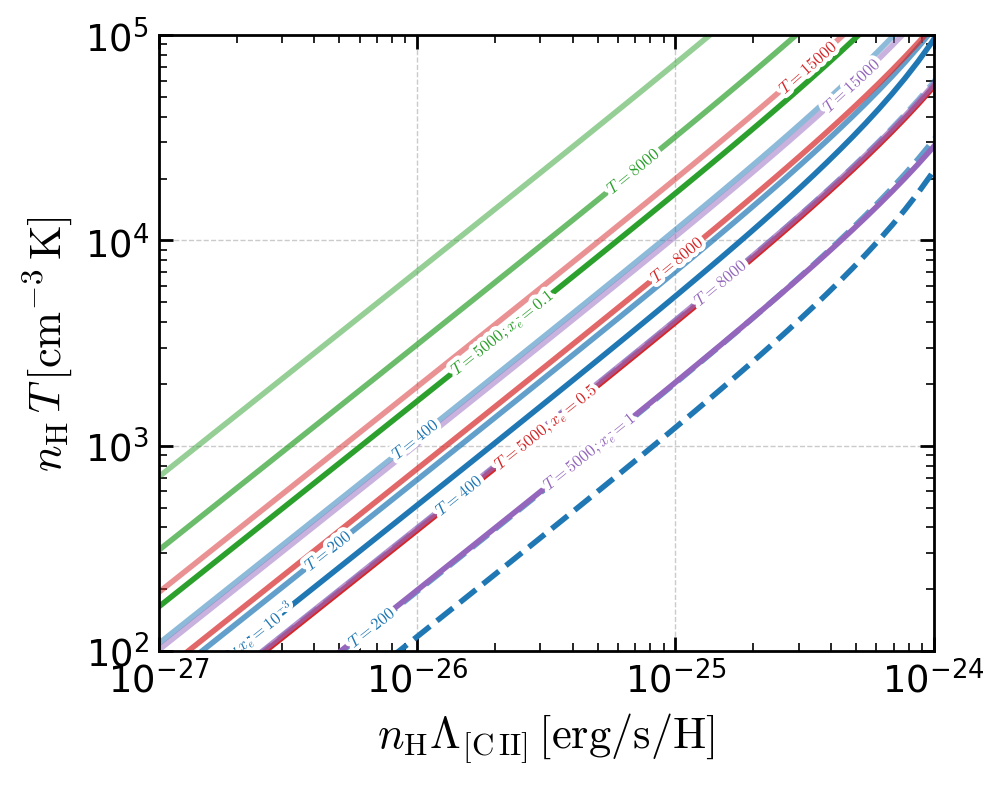

In [8]:
def add_nLambda_pok(**kwargs):
    nLambda = np.logspace(-28,-23,100)
    x = nLambda
    for T_,alpha_ in zip([100,200,400],[1,0.7,0.5]):
        y = get_n_from_nLambda(nLambda, T_, xe = 1.e-3)
        plt.plot(x[y>0],T_*y[y>0],
                color='C0', alpha=alpha_,
                label=f'$T={T_}, x_e=10^{{-3}}$' if T_== 100 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 1.e-2)
        plt.plot(x[y>0],T_*y[y>0],
                color='C0', alpha=alpha_, ls = '--',
                label=f'$T={T_}, x_e=10^{{-2}}$' if T_== 100 else f'$T={T_}$',
                **kwargs)
        # plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
        #          color='C0', ls=':', alpha=alpha_)

    # for T_ in [1000,3000,5000]:
    #     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
    #     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
    #              color='C1', ls=':')

    for T_,alpha_ in zip([5000,8000,15000],[1,0.7,0.5]):
        y = get_n_from_nLambda(nLambda, T_, xe = 0.1)
        plt.plot(x[y>0],T_*y[y>0],
                color='C2', alpha=alpha_,
                label=f'$T={T_}, x_e=0.1$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 0.5)
        plt.plot(x[y>0],T_*y[y>0],
                color='C3', alpha=alpha_,
                label=f'$T={T_}, x_e=0.5$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
        y = get_n_from_nLambda(nLambda, T_, xe = 1.)
        plt.plot(x[y>0],T_*y[y>0],
                color='C4', alpha=alpha_,
                label=f'$T={T_}, x_e=1$' if T_== 5000 else f'$T={T_}$',
                **kwargs)
plt.figure(figsize=(5,4))
add_nLambda_pok()
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.ylim(1.e2,1.e5)
plt.xlim(1.e-27,1.e-24)
plt.xlabel(r'$n_{\rm H} \Lambda_{[{\rm C\,II}]}\,[{\rm erg/s/H}]$')
plt.ylabel(r'$n_{\rm H}\,T\,[{\rm cm^{-3}}\,{\rm K}]$')

labelLines(plt.gca().get_lines(), zorder=2.5,fontsize=6, outline_width=3)
plt.savefig('CII_figures/nLamdba_pok.png')

In [9]:
import cmasher as cmr

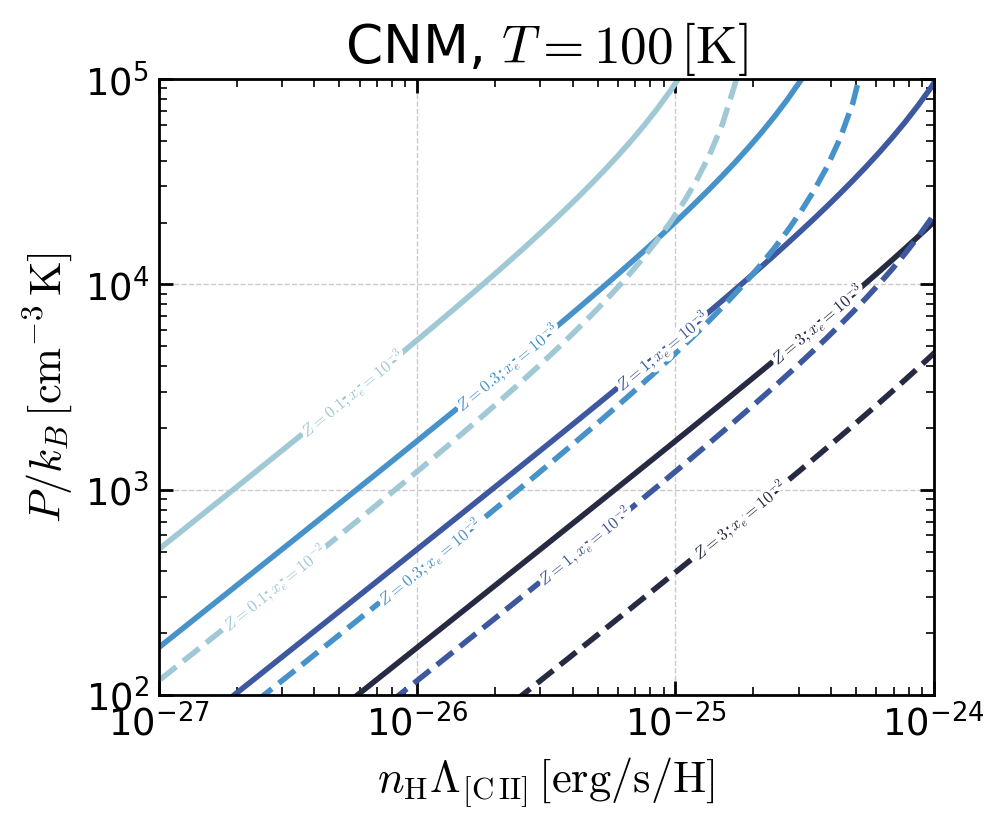

In [10]:
plt.figure(figsize=(5,4))
nLambda = np.logspace(-28,-23,100)
for Z_, c in zip([3,1,0.3,0.1],cmr.take_cmap_colors('cmr.arctic',4,cmap_range=(0.2,0.8))):
    for T_,alpha_ in zip([100,],[1,]):
        n = get_n_from_nLambda(nLambda, T_, xe = 1.e-3, Z=Z_)
        idx = n>0
        plt.plot(nLambda[idx],T_*n[idx],
                color=c, alpha=alpha_,
                label=f'$Z={Z_}, x_e=10^{{-3}}$' if T_== 100 else f'$Z={Z_}$')
        n = get_n_from_nLambda(nLambda, T_, xe = 1.e-2, Z=Z_)
        idx = n>0
        plt.plot(nLambda[idx],T_*n[idx],
                color=c, alpha=alpha_, ls = '--',
                label=f'$Z={Z_}, x_e=10^{{-2}}$' if T_== 100 else f'$Z={Z_}$')
    # plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
    #          color='C0', ls=':', alpha=alpha_)

# for T_ in [1000,3000,5000]:
#     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
#     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
#              color='C1', ls=':')

# for T_,alpha_ in zip([5000,8000,15000],[1,0.7,0.5]):
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.1),
#              color='C2', alpha=alpha_,
#              label=f'$T={T_}, x_e=0.1$' if T_== 5000 else f'$T={T_}$')
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.5),
#             color='C3', alpha=alpha_,
#             label=f'$T={T_}, x_e=0.5$' if T_== 5000 else f'$T={T_}$')
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.),
#             color='C4', alpha=alpha_,
#             label=f'$T={T_}, x_e=1$' if T_== 5000 else f'$T={T_}$')
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.ylim(1.e2,1.e5)
plt.xlim(1.e-27,1.e-24)
plt.xlabel(r'$n_{\rm H} \Lambda_{[{\rm C\,II}]}\,[{\rm erg/s/H}]$')
plt.ylabel(r'$P/k_B\,[{\rm cm^{-3}\,K}]$')
plt.title(r'CNM, $T=100\,[{\rm K}]$')
labelLines(plt.gca().get_lines(), zorder=2.5,fontsize=6, outline_width=3)
plt.savefig('CII_figures/nLamdba_pok.png')

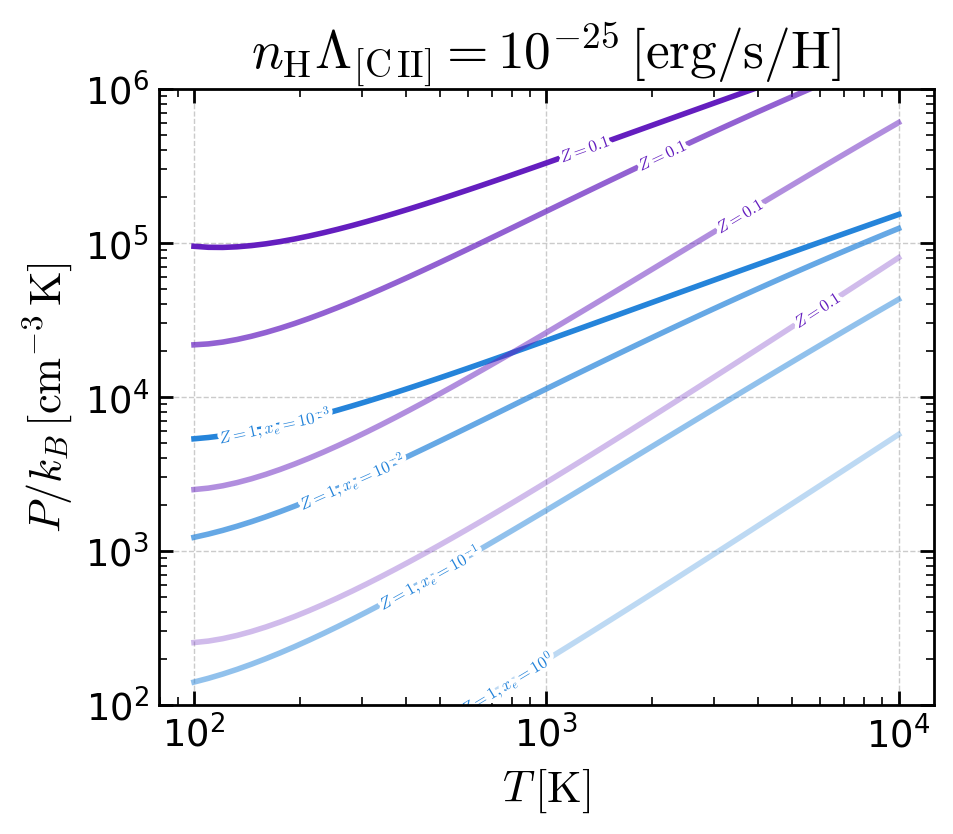

In [11]:
plt.figure(figsize=(5,4))
nLambda = 1.e-25
for Z_, c in zip([1,0.1],cmr.take_cmap_colors('cmr.guppy_r',4,cmap_range=(0.2,0.8))):
    for xe_, alpha_ in zip([-3,-2,-1,0],[1,0.7,0.5,0.3]):
        T_ = np.logspace(2,4)
        n = get_n_from_nLambda(nLambda, T_, xe = 10**xe_, Z=Z_)
        idx = n>0
        plt.plot(T_[idx],T_[idx]*n[idx],color=c,alpha=alpha_,
                label=f'$Z={Z_}, x_e=10^{{{xe_}}}$' if Z_== 1 else f'$Z={Z_}$')

    # plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
    #          color='C0', ls=':', alpha=alpha_)

# for T_ in [1000,3000,5000]:
#     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
#     plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
#              color='C1', ls=':')

# for T_,alpha_ in zip([5000,8000,15000],[1,0.7,0.5]):
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.1),
#              color='C2', alpha=alpha_,
#              label=f'$T={T_}, x_e=0.1$' if T_== 5000 else f'$T={T_}$')
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.5),
#             color='C3', alpha=alpha_,
#             label=f'$T={T_}, x_e=0.5$' if T_== 5000 else f'$T={T_}$')
#     plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.),
#             color='C4', alpha=alpha_,
#             label=f'$T={T_}, x_e=1$' if T_== 5000 else f'$T={T_}$')
plt.xscale('log')
plt.yscale('log')
# plt.legend()
plt.ylim(1.e2,1.e6)
# plt.xlim(1.e-27,1.e-24)
plt.title(r'$n_{\rm H} \Lambda_{[{\rm C\,II}]} = 10^{-25}\,[{\rm erg/s/H}]$')
plt.ylabel(r'$P/k_B\,[{\rm cm^{-3}\,K}]$')
plt.xlabel(r'$T\,[{\rm K}]$')

labelLines(plt.gca().get_lines(), zorder=2.5,fontsize=6, outline_width=3)
plt.savefig('CII_figures/T_pok.png')

# TIGRESS-NCR data

In [12]:
from pyathena.tigress_ncr.ncr_paper_lowz import LowZData

[stellar-vis1.princeton.edu:1361406] mca_base_component_repository_open: unable to open mca_op_avx: /usr/local/openmpi/4.1.0/gcc/lib64/openmpi/mca_op_avx.so: undefined symbol: ompi_op_base_module_t_class (ignored)


In [13]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rs

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [14]:
from CII_calculation import (get_faceon_projection, get_vertical_profiles,
                             get_phase_boolean, get_CII_OI)

In [15]:
sim = pdata.sa.set_model(pdata.mlist[0])
ds = sim.load_vtk(sim.nums[-1])

# calculate cooling rate (=n^2Lambda)
crate,data = get_CII_OI(sim,ds)

# define phase
phase = get_phase_boolean(data)

/home/changgoo/pyathena/pyathena/microphysics/cool.py:358: RuntimeWarning: overflow encountered in exp
  k10e = fac * np.exp(lngamma10e) / g1CI_
/home/changgoo/pyathena/pyathena/microphysics/cool.py:359: RuntimeWarning: overflow encountered in exp
  k20e = fac * np.exp(lngamma20e) / g2CI_
/home/changgoo/pyathena/pyathena/microphysics/cool.py:360: RuntimeWarning: overflow encountered in exp
  k21e = fac * np.exp(lngamma21e) / g2CI_
/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/xarray/core/computation.py:771: RuntimeWarning: overflow encountered in power
  result_data = func(*input_data)


In [17]:
proj = get_faceon_projection(sim,ds,crate,data,phase)

In [18]:
phlist = ['CNM','UNM','WNM','WpIM','WIM','total_CW'] # only consider important components

In [19]:
print(f'{sim.basename} N={ds.num}')

R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0 N=1000


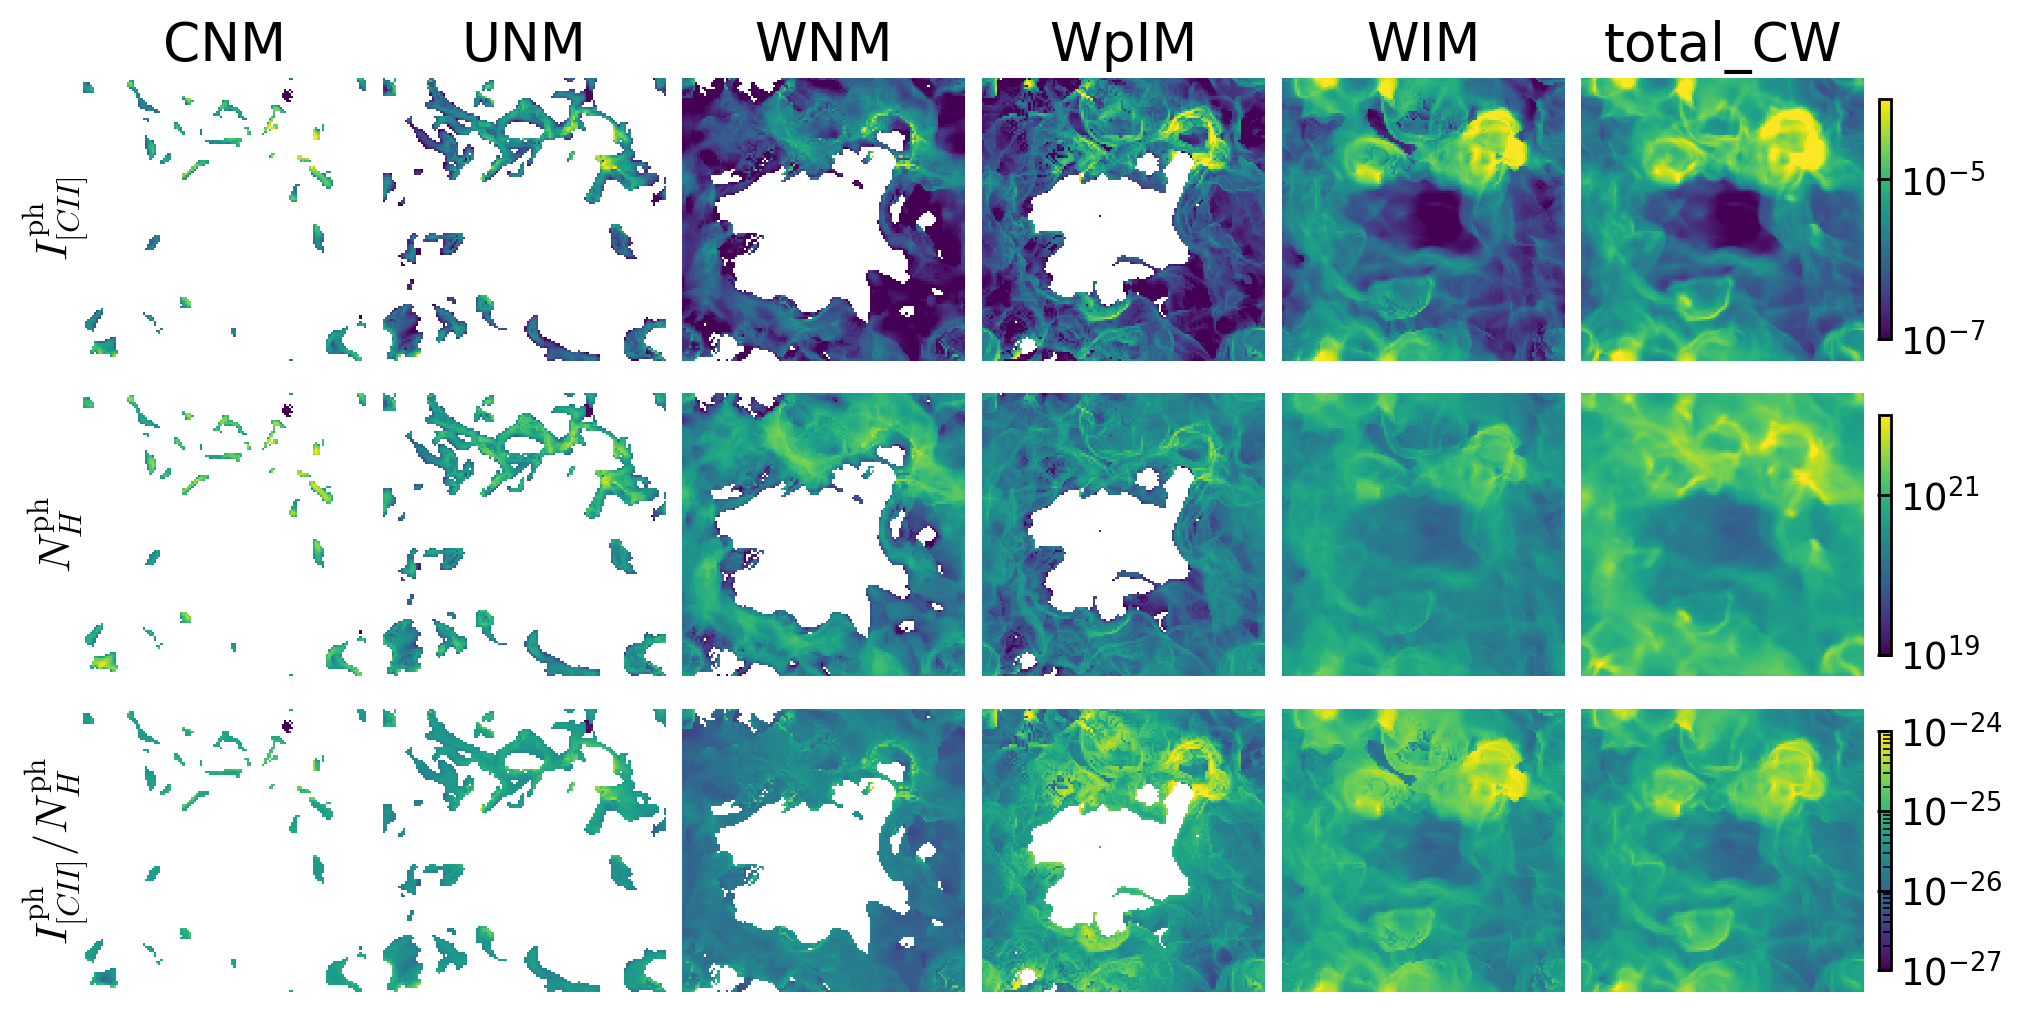

In [20]:
fig, axes = plt.subplots(3, 6, figsize=(10,5), layout="constrained")
for ax,f,norm in zip(axes,['ICII', 'NH', 'nLambda'],
                    [LogNorm(1.e-7,1.e-4),LogNorm(1.e19,1.e22),
                     LogNorm(1.e-27,1.e-24),LogNorm(1.e-28,1.e-24)]):
    for ax_,ph in zip(ax, phlist):
        plt.sca(ax_)
        img = proj[f].sel(phase=ph)
        im = plt.imshow(img,norm=norm,
            interpolation='nearest',origin='lower')
        plt.axis('off')
        plt.title('')
    plt.colorbar(im,shrink=0.8)

for ax,ph in zip(axes[0,:],phlist):
    ax.set_title(ph)
for ax,ylabel in zip(axes[:,0],
                     [r'$I_{[CII]}^{\rm ph}$',
                     r'$N_H^{\rm ph}$',
                     r'$I_{[CII]}^{\rm ph}/N_H^{\rm ph}$',r'$n_H\Lambda$']):
    ax.annotate(ylabel,(-0.1,0.5),xycoords='axes fraction',
                rotation=90,ha='center',va='center')
plt.savefig('CII_figures/CII_map.png',bbox_inches='tight')

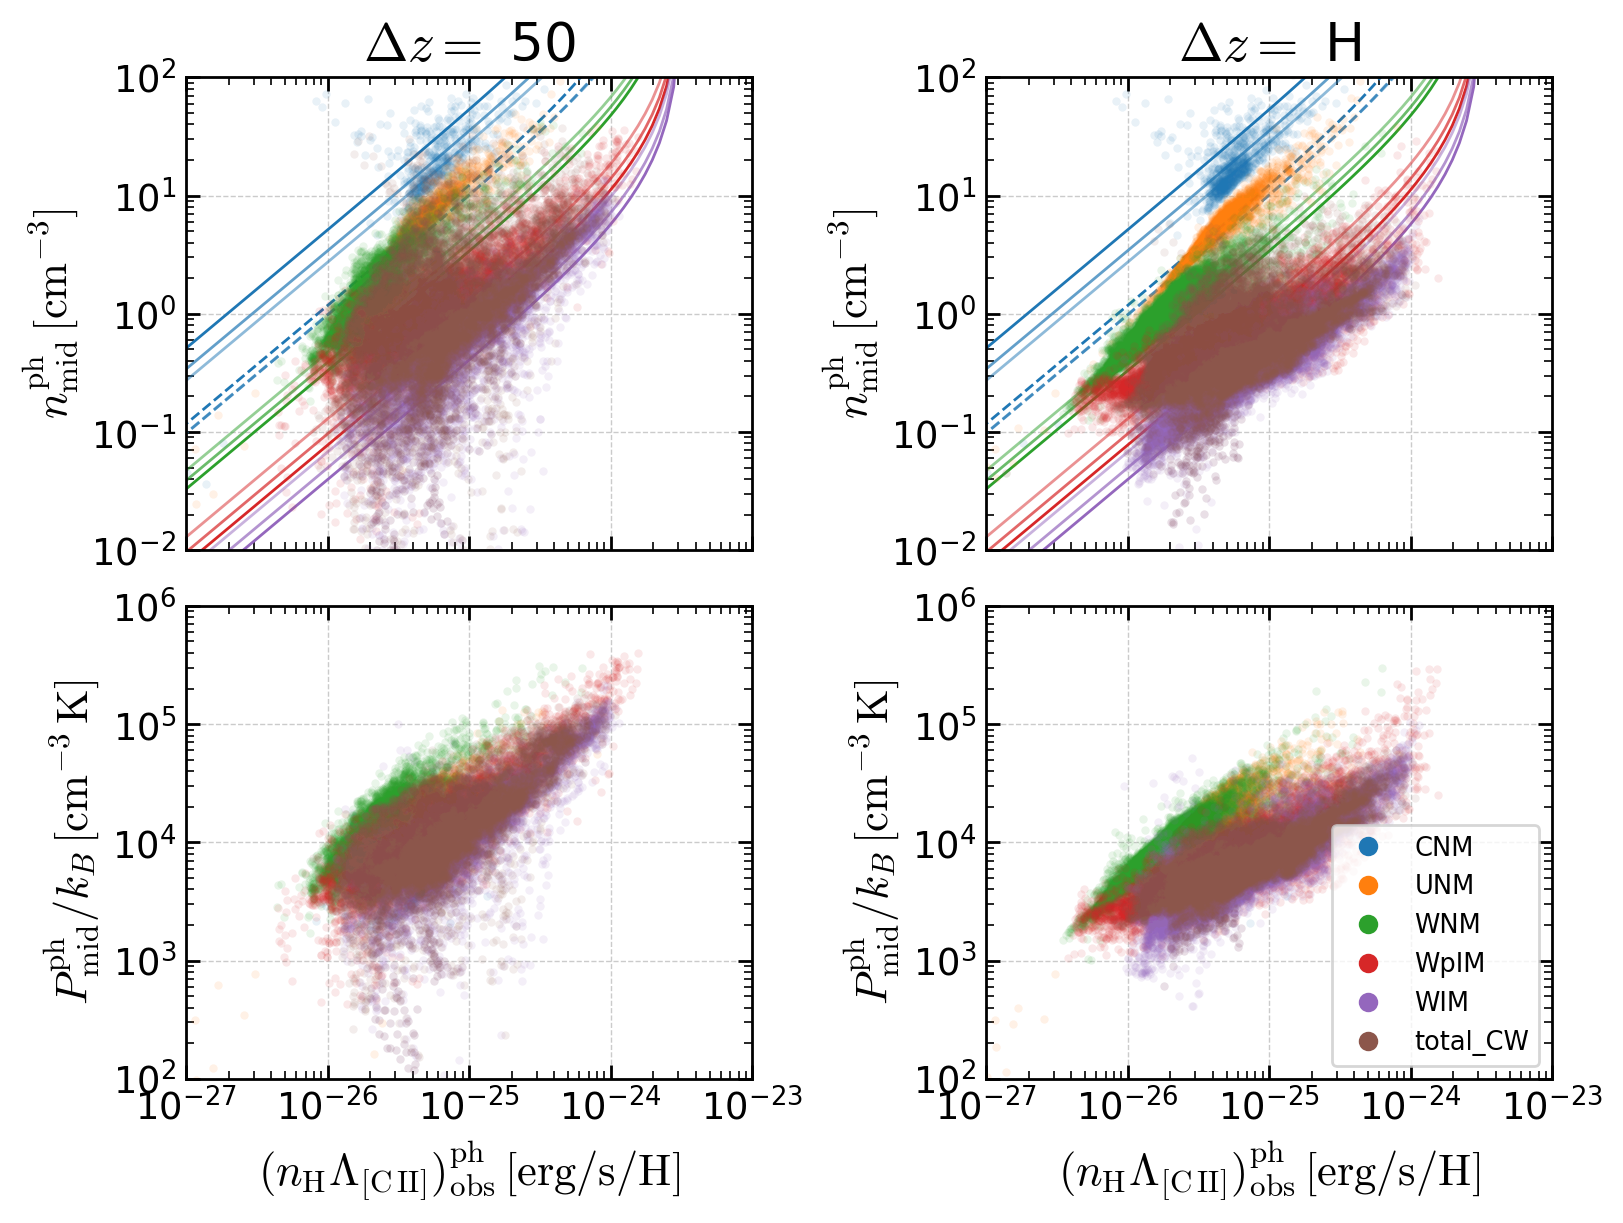

In [21]:
fig,axes_ = plt.subplots(2,2, figsize=(8,6), sharex=True, layout='constrained')

for axes, dz in zip(axes_.T,['50','H']):
    plt.sca(axes[0])
    add_nLambda_n(lw=1)
    for ph in phlist:
        vol = proj[f'V_mid_{dz}'].sel(phase=ph).data.flatten()
        nH = proj[f'nH_mid_{dz}'].sel(phase=ph).data.flatten()/vol
        T = proj[f'T_mid_{dz}'].sel(phase=ph).data.flatten()/vol
        pok = proj[f'pok_mid_{dz}'].sel(phase=ph).data.flatten()/vol
        ne = proj[f'ne_mid_{dz}'].sel(phase=ph).data.flatten()/vol

        nLambda = proj['nLambda'].sel(phase=ph).data.flatten()

        plt.sca(axes[0])
        l,=plt.loglog(nLambda, nH ,marker='.',ls='',alpha=0.1,mew=0,label=ph)

        plt.sca(axes[1])
        l,=plt.loglog(nLambda, pok ,marker='.',ls='',alpha=0.1,mew=0)

    plt.sca(axes[0])
    # plt.legend(fontsize='x-small')
    plt.ylim(1.e-2,1.e2)
    plt.xlim(1.e-27,1.e-23)
    # plt.xlabel(r'$(n_{\rm H} \Lambda_{[{\rm C\,II}]})^{\rm ph}_{\rm obs}\,[{\rm erg/s/H}]$')
    plt.ylabel(r'$n_{\rm mid}^{\rm ph}\,[{\rm cm^{-3}}]$')
    plt.title(f'$\Delta z =$ {dz}')

    plt.sca(axes[1])
    plt.xlim(1.e-27,1.e-23)
    plt.ylim(1.e2,1.e6)
    plt.xlabel(r'$(n_{\rm H} \Lambda_{[{\rm C\,II}]})^{\rm ph}_{\rm obs}\,[{\rm erg/s/H}]$')
    plt.ylabel(r'$P^{\rm ph}_{\rm mid}/k_B\,[{\rm cm^{-3}\,K}]$')

from matplotlib.lines import Line2D

pkwargs = dict(marker='o',ls='')
custom_lines = []
for i,ph in enumerate(phlist):
    custom_lines.append(Line2D([0], [0], color=f'C{i}', **pkwargs))
leg1 = plt.legend(
    custom_lines,
    phlist+['total'],
    fontsize="xx-small",
)

plt.savefig('CII_figures/CII_nP.png',bbox_inches='tight')


In [22]:
def get_avg(proj,dz='50'):
    # physical quantities
    vol = proj[f'V_mid_{dz}']
    davg1 = dict()
    davg2 = dict()
    for f in ['nH','T','pok','ne']:
        data_xy = proj[f'{f}_mid_{dz}']/vol
        davg1[f] = data_xy.where(vol>0).mean(dim=['x','y'])
        davg2[f] = proj[f'{f}_mid_{dz}'].sum(dim=['x','y'])/vol.sum(dim=['x','y'])

    ICII = proj['ICII'].sum(dim=['x','y'])
    NH = proj['NH'].sum(dim=['x','y'])
    nLavg = 4*np.pi*ICII/NH

    return nLavg,davg1,davg2

CNM 275.8420097968883 0.0011009199248933916
CNM 245.5337061500888 0.0009085586722860005
UNM 2956.9614543718862 0.009246022246514812
UNM 2878.7752242152465 0.008704315128407403
WNM 7723.071517989055 0.04369800392541866
WNM 7799.456670853057 0.040816652251683294
WpIM 8193.807041018761 0.40794432805702324
WpIM 8232.183154955794 0.38577653803105544
WIM 11458.958208453036 0.9925901720210341
WIM 10001.536338999753 0.9951672299717341
total_CW 9650.571997461997 0.35448314046597884
total_CW 8557.998681877674 0.3243768644753043
CNM 275.8420097968883 0.0011009199248933916
CNM 245.5337061500888 0.0009085586722860005
UNM 2956.9614543718862 0.009246022246514812
UNM 2878.7752242152465 0.008704315128407403
WNM 7723.071517989055 0.04369800392541866
WNM 7799.456670853057 0.040816652251683294
WpIM 8193.807041018761 0.40794432805702324
WpIM 8232.183154955794 0.38577653803105544
WIM 11458.958208453036 0.9925901720210341
WIM 10001.536338999753 0.9951672299717341
total_CW 9650.571997461997 0.3544831404659788

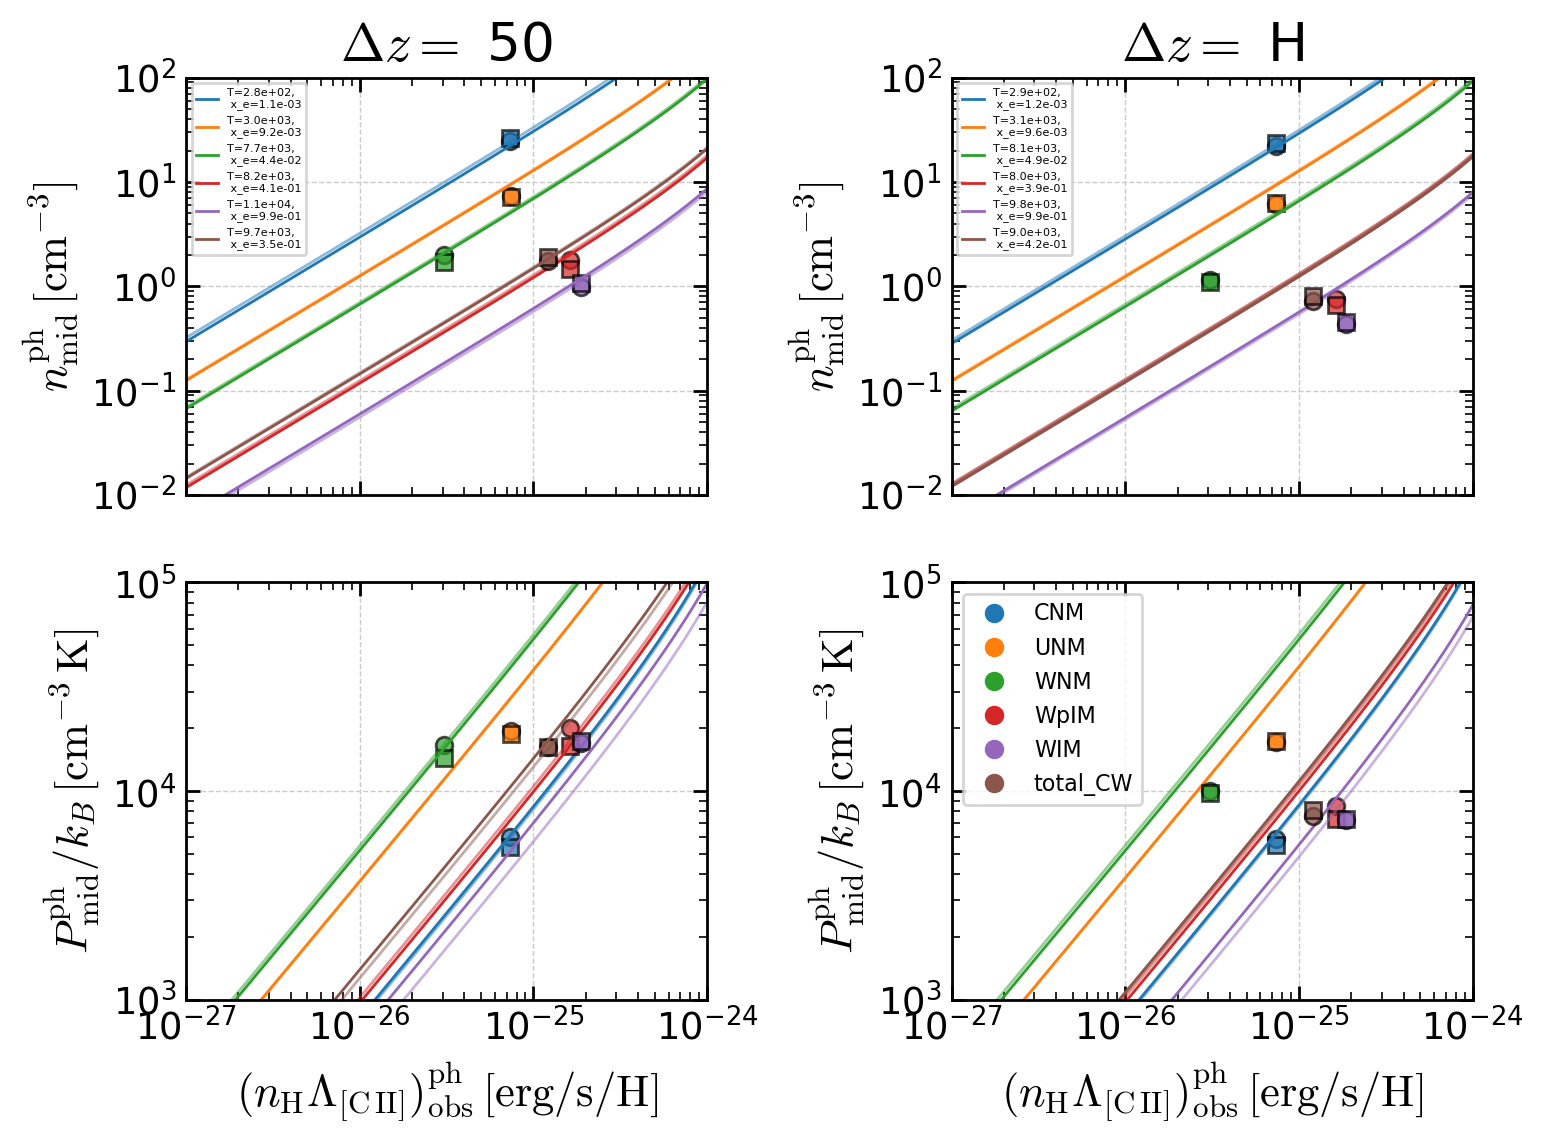

In [23]:
fig,axes_ = plt.subplots(2,2, figsize=(8,6), sharex=True, layout='constrained')

for axes,dz in zip(axes_.T,['50','H']):
    nLavg,davg1,davg2 = get_avg(proj,dz=dz)
    for ax, f in zip(axes, ['nH','pok']):
        plt.sca(ax)
        analytic_lines = []
        labels = []
        for ph in phlist:
            x = nLavg.sel(phase=ph)
            y1 = davg1[f].sel(phase=ph)
            l,=plt.loglog(x,y1,marker='o',mec='k',alpha=0.7,ls='')
            y2 = davg2[f].sel(phase=ph)
            l,=plt.loglog(x,y2,marker='s',ls='',
                        mec='k',alpha=0.7,color=l.get_color())

            x_ana=np.logspace(-28,-24,100)
            for davg,alpha in zip([davg1,davg2],[1,0.5]):
                Tavg = davg['T'].sel(phase=ph).data
                xeavg = (davg['ne'].sel(phase=ph)/davg['nH'].sel(phase=ph)).data
                print(ph,Tavg,xeavg)
                y_ana=get_n_from_nLambda(x_ana, Tavg , xe = xeavg)
                if f == 'pok':
                    y_ana *= Tavg
                label = f'T={Tavg:4.1e},\n x_e={xeavg:4.1e}'
                l,= plt.plot(x_ana,y_ana,color=l.get_color(),lw=1,alpha=alpha,
                            label=label)
                if alpha == 1:
                    analytic_lines.append(l)
                    labels.append(label)

    # add_nLambda_n()
        if f == 'nH':
            # plt.xlabel(r'$(n_{\rm H} \Lambda_{[{\rm C\,II}]})^{\rm ph}_{\rm obs}\,[{\rm erg/s/H}]$')
            plt.ylabel(r'$n_{\rm mid}^{\rm ph}\,[{\rm cm^{-3}}]$')
            plt.ylim(1.e-2,1.e2)
        elif f == 'pok':
            plt.xlabel(r'$(n_{\rm H} \Lambda_{[{\rm C\,II}]})^{\rm ph}_{\rm obs}\,[{\rm erg/s/H}]$')
            plt.ylabel(r'$P_{\rm mid}^{\rm ph}/k_B\,[{\rm cm^{-3}\,K}]$')
            plt.ylim(1.e3,1.e5)


    plt.xlim(1.e-27,1.e-24)

    plt.sca(axes[0])
    plt.legend(analytic_lines,labels,fontsize=4)
    plt.title(f'$\Delta z =$ {dz}')
# labelLines(analytic_lines, zorder=2.5,fontsize='xx-small',
#         xvals=[2.e-27,2.e-27,2.e-27,1.e-26,2.e-27,2.e-27,], ha='left')

plt.sca(axes[1])
from matplotlib.lines import Line2D

pkwargs = dict(marker='o',ls='')
custom_lines = []
for i,ph in enumerate(phlist):
    custom_lines.append(Line2D([0], [0], color=f'C{i}', **pkwargs))
leg1 = plt.legend(
    custom_lines,
    phlist+['total'],
    fontsize=8,
    loc=2
)
plt.tight_layout()

plt.savefig('CII_figures/CII_nLambda_nP_avg.png',bbox_inches='tight')


In [26]:
crate

<xarray.Dataset>
Dimensions:  (x: 128, y: 128, z: 768)
Coordinates:
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * y        (y) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * z        (z) float64 -3.068e+03 -3.06e+03 -3.052e+03 ... 3.06e+03 3.068e+03
Data variables:
    CI       (z, y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    CII      (z, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    OI       (z, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    neb      (z, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grRec    (z, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [27]:
zprof = get_vertical_profiles(sim,ds,crate,data,phase)

In [44]:
ds.num

1000

In [48]:
outdir = os.path.join(sim.savdir,'CII')
os.makedirs(outdir,exist_ok=True)
outfile = os.path.join(outdir,f'CII_proj.{ds.num:04d}.nc')
proj.sel(phase=['CMM','CNM','UNM','WNM','WpIM','WIM','total_CW','total']).to_netcdf(outfile)
outfile = os.path.join(outdir,f'CII_zprof.{ds.num:04d}.nc')
zprof.to_netcdf(outfile)

In [46]:
outfile

'/scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0/CII/CII_proj.1000.nc'

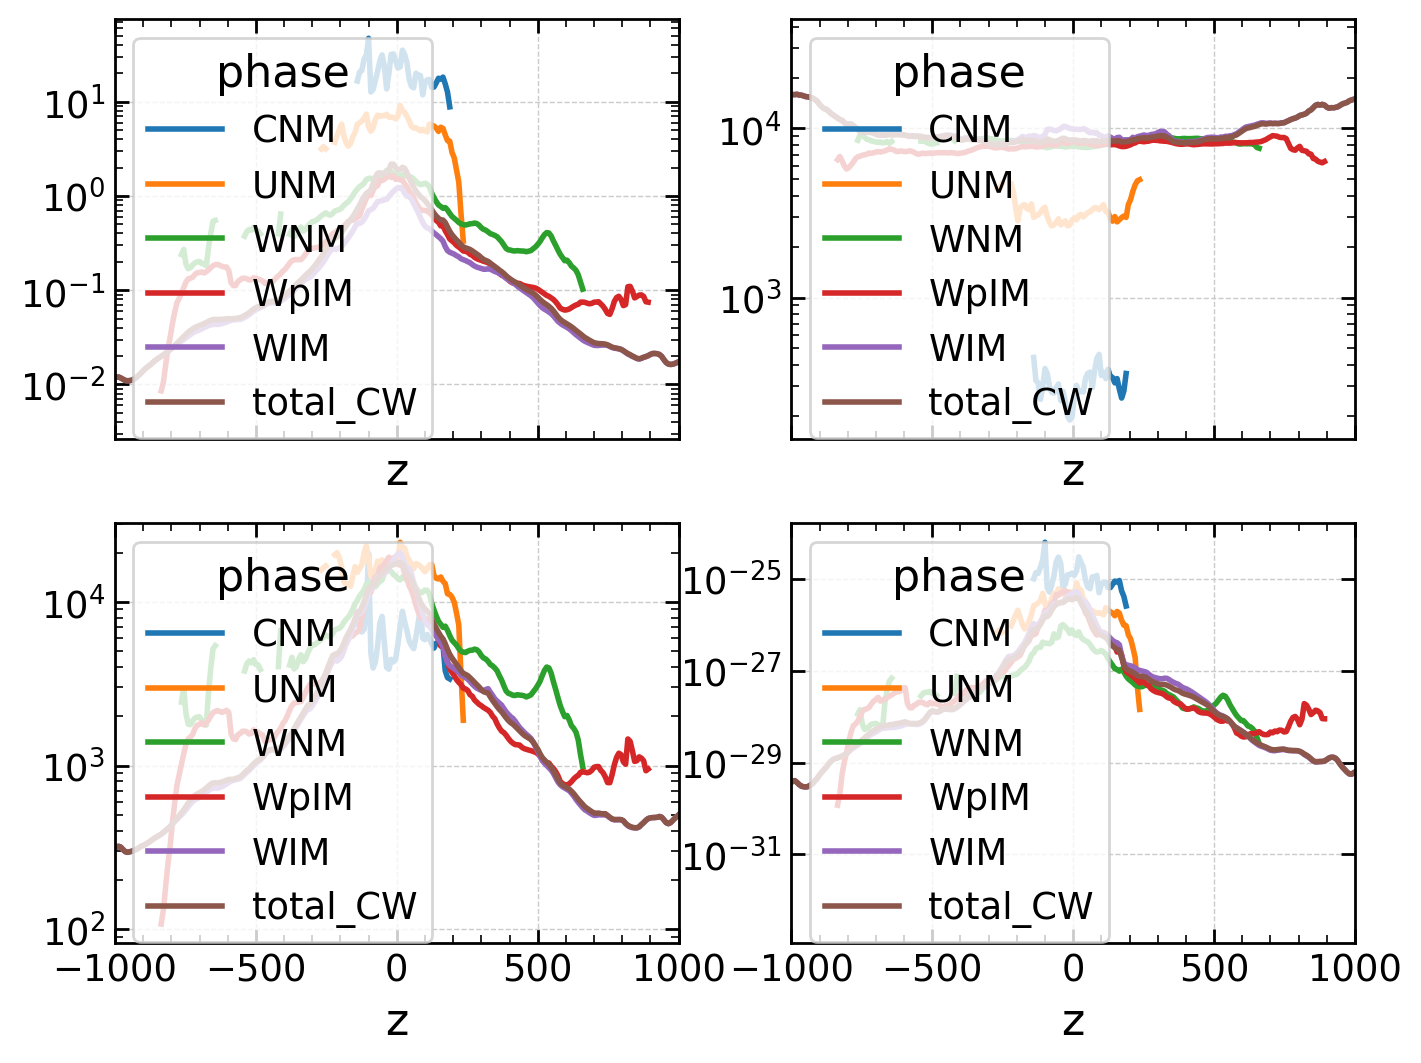

In [28]:
fig,axes =plt.subplots(2,2, figsize=(8,6),sharex=True)
axes = axes.flatten()
for ax,y in zip(axes,['nH','T','pok','jCII']):
    plt.sca(ax)
    (zprof[y]/zprof['A']).sel(phase=['CNM','UNM','WNM','WpIM','WIM','total_CW']).plot(hue='phase')
    plt.yscale('log')
    plt.xlim(-1.e3,1.e3)

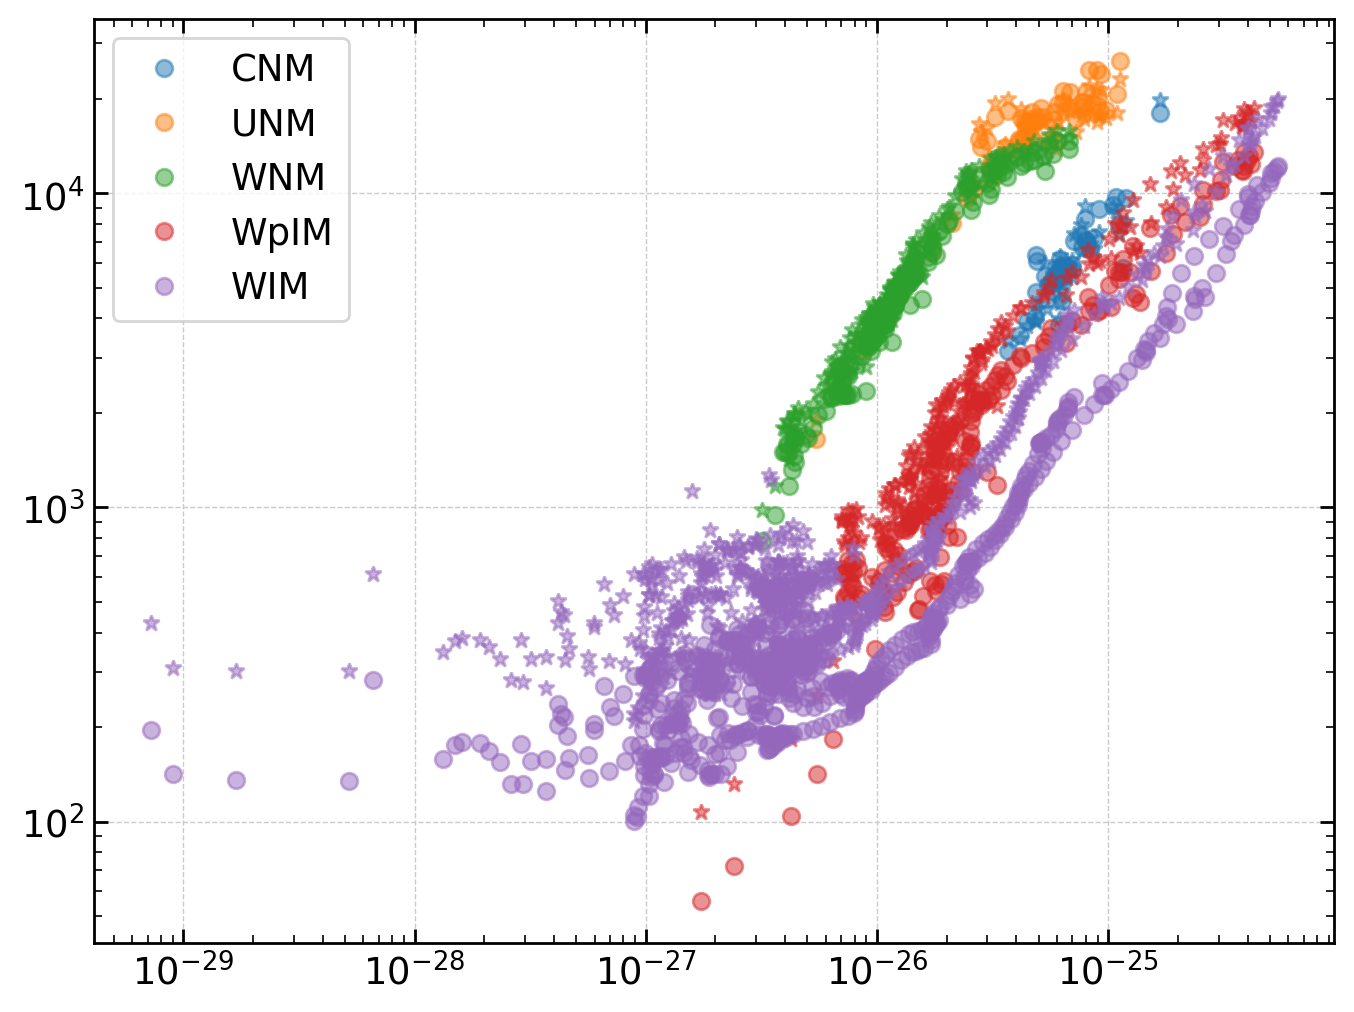

In [30]:
for ph in ['CNM','UNM','WNM','WpIM','WIM']:
    l,=plt.plot(zprof['nLambda'].sel(phase=ph),
             (zprof['nH']/zprof['A']).sel(phase=ph)*(zprof['T']/zprof['A']).sel(phase=ph),
             label=ph,marker='o',alpha=0.5,ls='')
    l,=plt.plot(zprof['nLambda'].sel(phase=ph),
              (zprof['pok']/zprof['A']).sel(phase=ph),
             color=l.get_color(),
             marker='*',alpha=0.5,ls='')
plt.xscale('log')
plt.yscale('log')
plt.legend()

(1e-27, 1e-24)

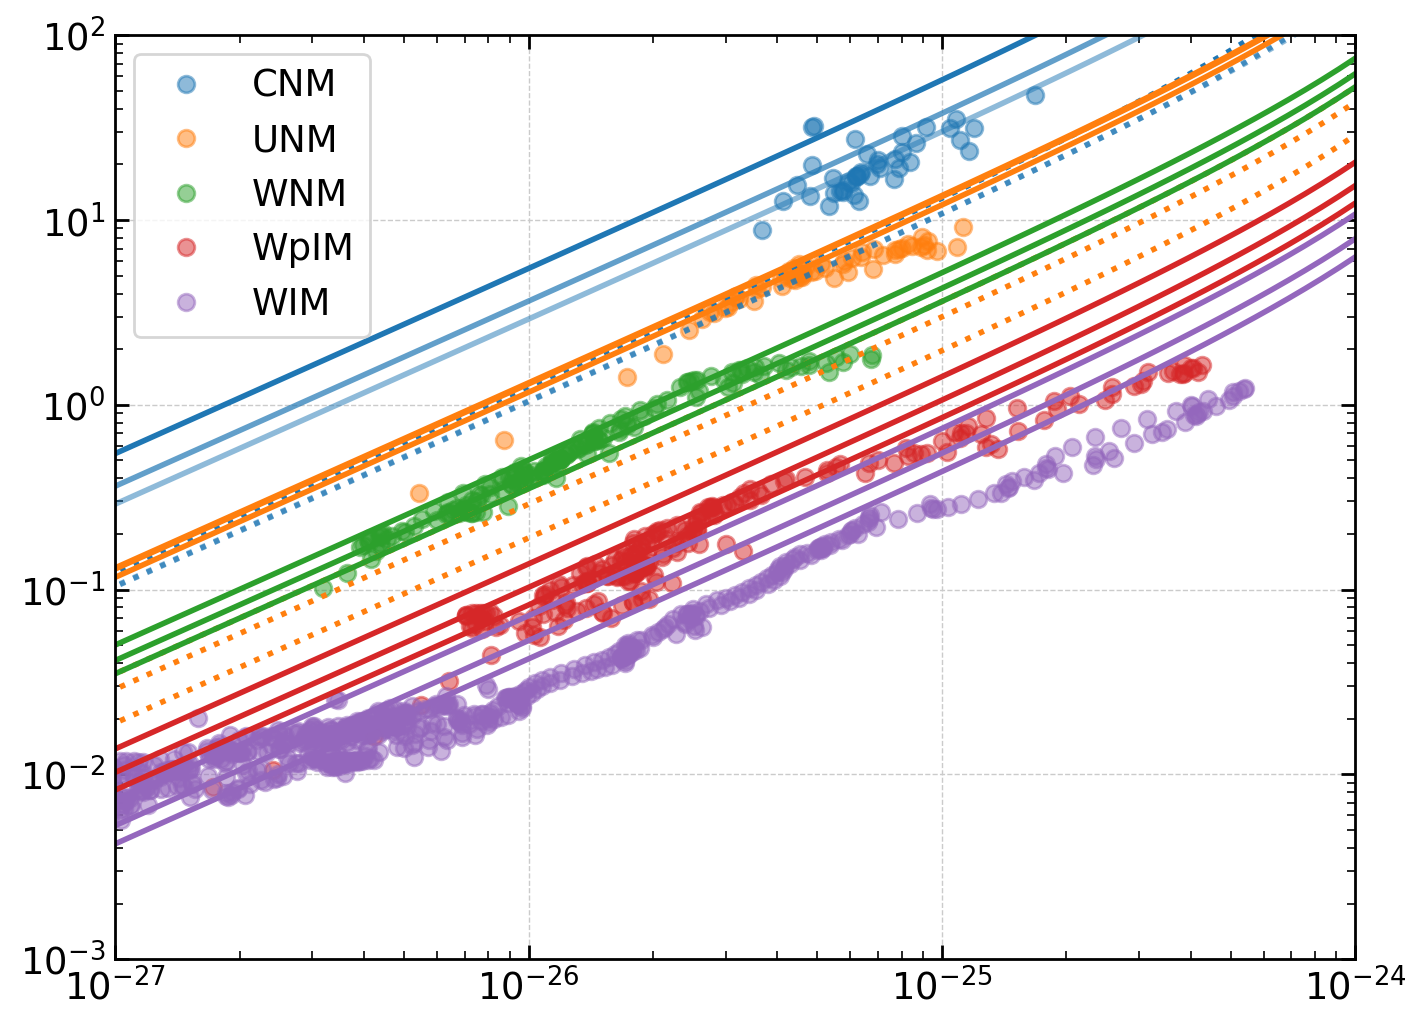

In [149]:
for ph in ['CNM','UNM','WNM','WpIM','WIM']:
    l,=plt.plot((4*np.pi*jCIIdA_zprof/ndA_zprof).sel(phase=ph),
             (ndA_zprof/A_zprof).sel(phase=ph),
             label=ph,marker='o',alpha=0.5,ls='')
    # plt.plot((nLambdaCIIdA_zprof/A_zprof).sel(phase=ph),
    #             (PdA_zprof/A_zprof).sel(phase=ph),
    #             color=l.get_color(),
    #             marker='*',alpha=0.5,ls='')
    # plt.plot(4*np.pi*ICII.sel(phase=ph).sum()/NH.sel(phase=ph).sum(), P.sel(phase=ph),
    #          color=l.get_color(),marker='o',markersize=10)
nLambda = np.logspace(-28,-24,100)
for T_,alpha_ in zip([100,200,400],[1,0.7,0.5]):
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-3),
             color='C0', alpha=alpha_)
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
             color='C0', ls=':', alpha=alpha_)

for T_ in [1000,3000,5000]:
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
             color='C1', ls=':')

for T_ in [5000,8000,1.5e4]:
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 0.1), color='C2')
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 0.5), color='C3')
    plt.plot(nLambda,get_n_from_nLambda(nLambda, T_, xe = 1.), color='C4')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(1.e-3,1.e2)
plt.xlim(1.e-27,1.e-24)

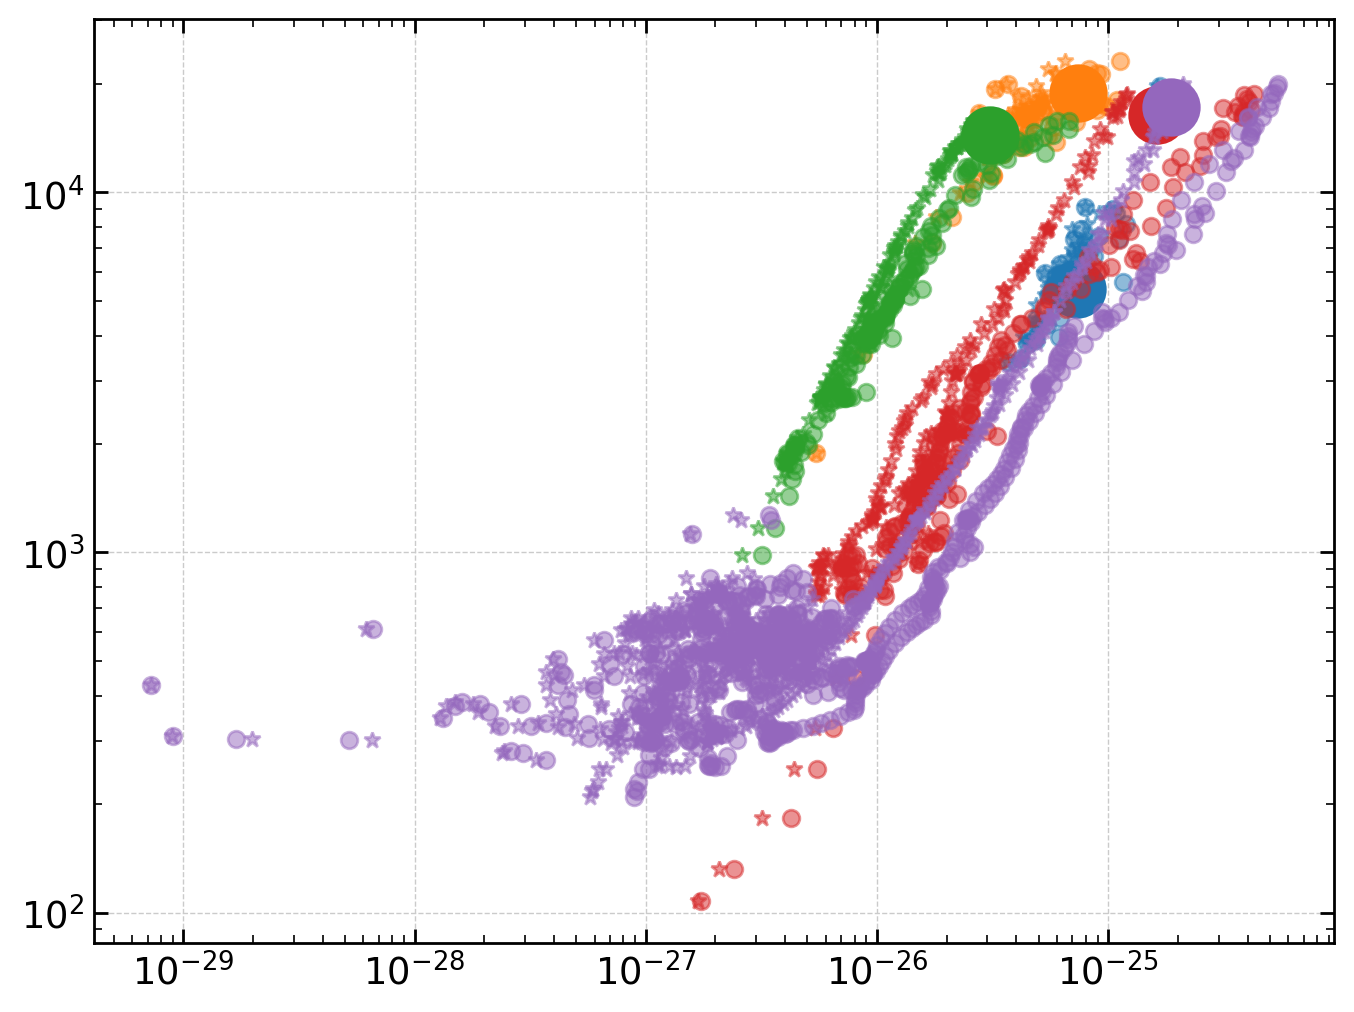

In [163]:
for ph in ['CNM','UNM','WNM','WpIM','WIM']:
    l,=plt.plot((4*np.pi*jCIIdA_zprof/ndA_zprof).sel(phase=ph),
             (PdA_zprof/A_zprof).sel(phase=ph),
             label=ph,marker='o',alpha=0.5,ls='')
    plt.plot((nLambdaCIIdA_zprof/A_zprof).sel(phase=ph),
                (PdA_zprof/A_zprof).sel(phase=ph),
                color=l.get_color(),
                marker='*',alpha=0.5,ls='')
    plt.plot(4*np.pi*ICII.sel(phase=ph).sum()/NH.sel(phase=ph).sum(),
             Pokmid.sel(phase=ph).sum()/Vmid.sel(phase=ph).sum(),
             color=l.get_color(),marker='o',markersize=20)
plt.yscale('log')
plt.xscale('log')

(1e-27, 1e-24)

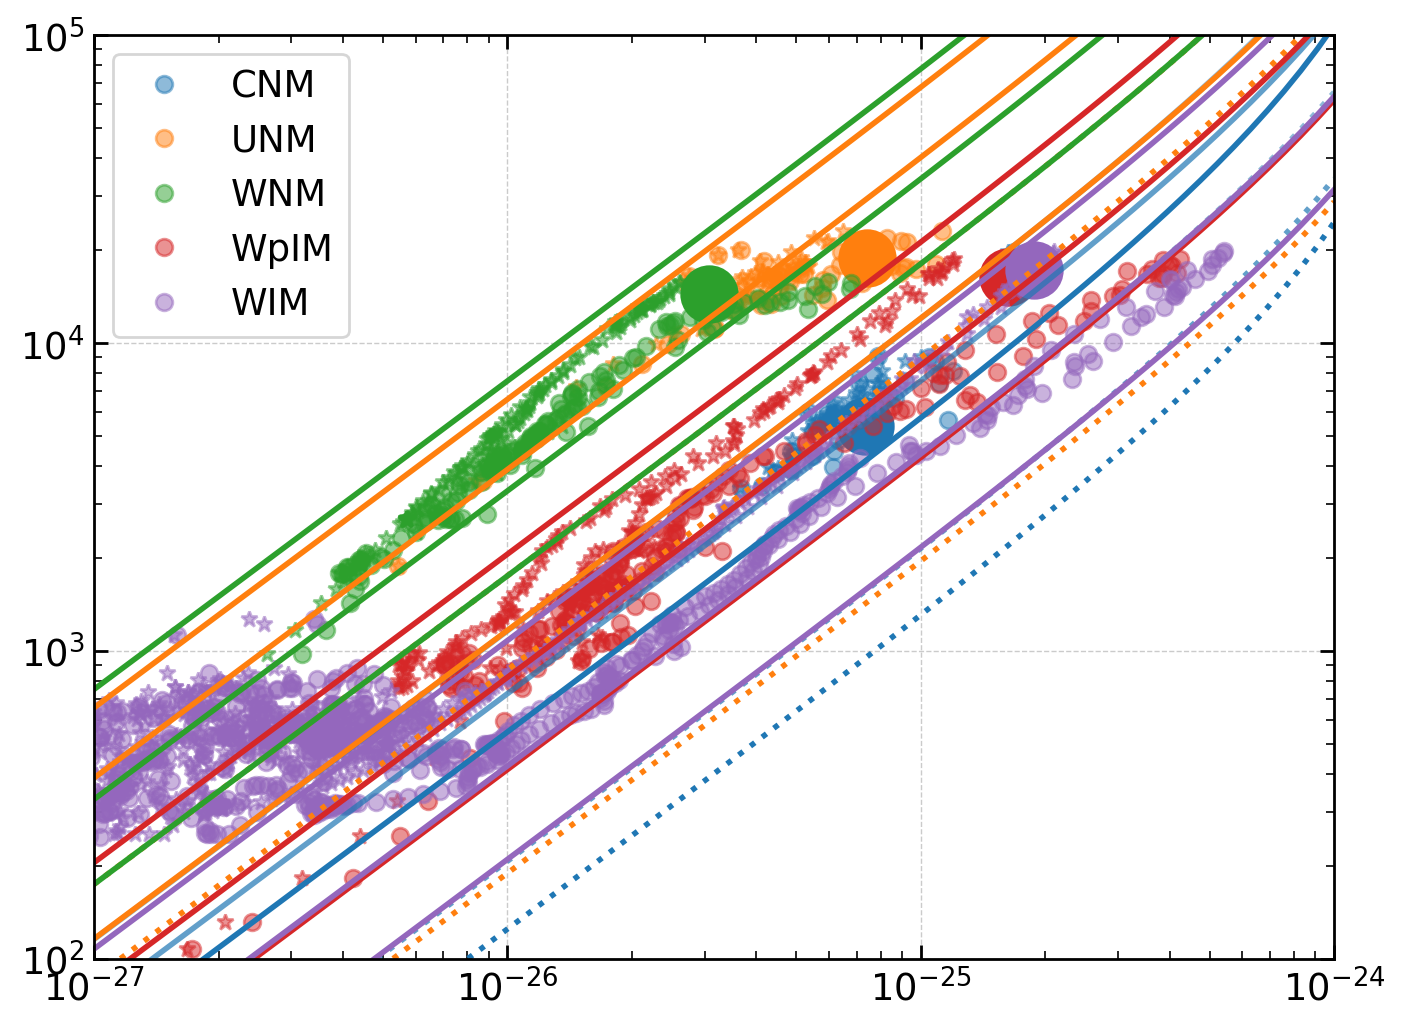

In [164]:
for ph in ['CNM','UNM','WNM','WpIM','WIM']:
    l,=plt.plot((4*np.pi*jCIIdA_zprof/ndA_zprof).sel(phase=ph),
             (PdA_zprof/A_zprof).sel(phase=ph),
             label=ph,marker='o',alpha=0.5,ls='')
    plt.plot((nLambdaCIIdA_zprof/A_zprof).sel(phase=ph),
                (PdA_zprof/A_zprof).sel(phase=ph),
                color=l.get_color(),
                marker='*',alpha=0.5,ls='')
    plt.plot(4*np.pi*ICII.sel(phase=ph).sum()/NH.sel(phase=ph).sum(),
             Pokmid.sel(phase=ph).sum()/Vmid.sel(phase=ph).sum(),
             color=l.get_color(),marker='o',markersize=20)
nLambda = np.logspace(-28,-24,100)
for T_,alpha_ in zip([100,200,400],[1,0.7,0.5]):
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.e-3),
             color='C0', alpha=alpha_)
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.e-2),
             color='C0', ls=':', alpha=alpha_)

for T_ in [1000,3000,5000]:
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.e-2), color='C1',)
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.e-1),
             color='C1', ls=':')

for T_ in [5000,8000,1.5e4]:
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.1), color='C2')
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 0.5), color='C3')
    plt.plot(nLambda,T_*get_n_from_nLambda(nLambda, T_, xe = 1.), color='C4')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e2,1.e5)
plt.xlim(1.e-27,1.e-24)

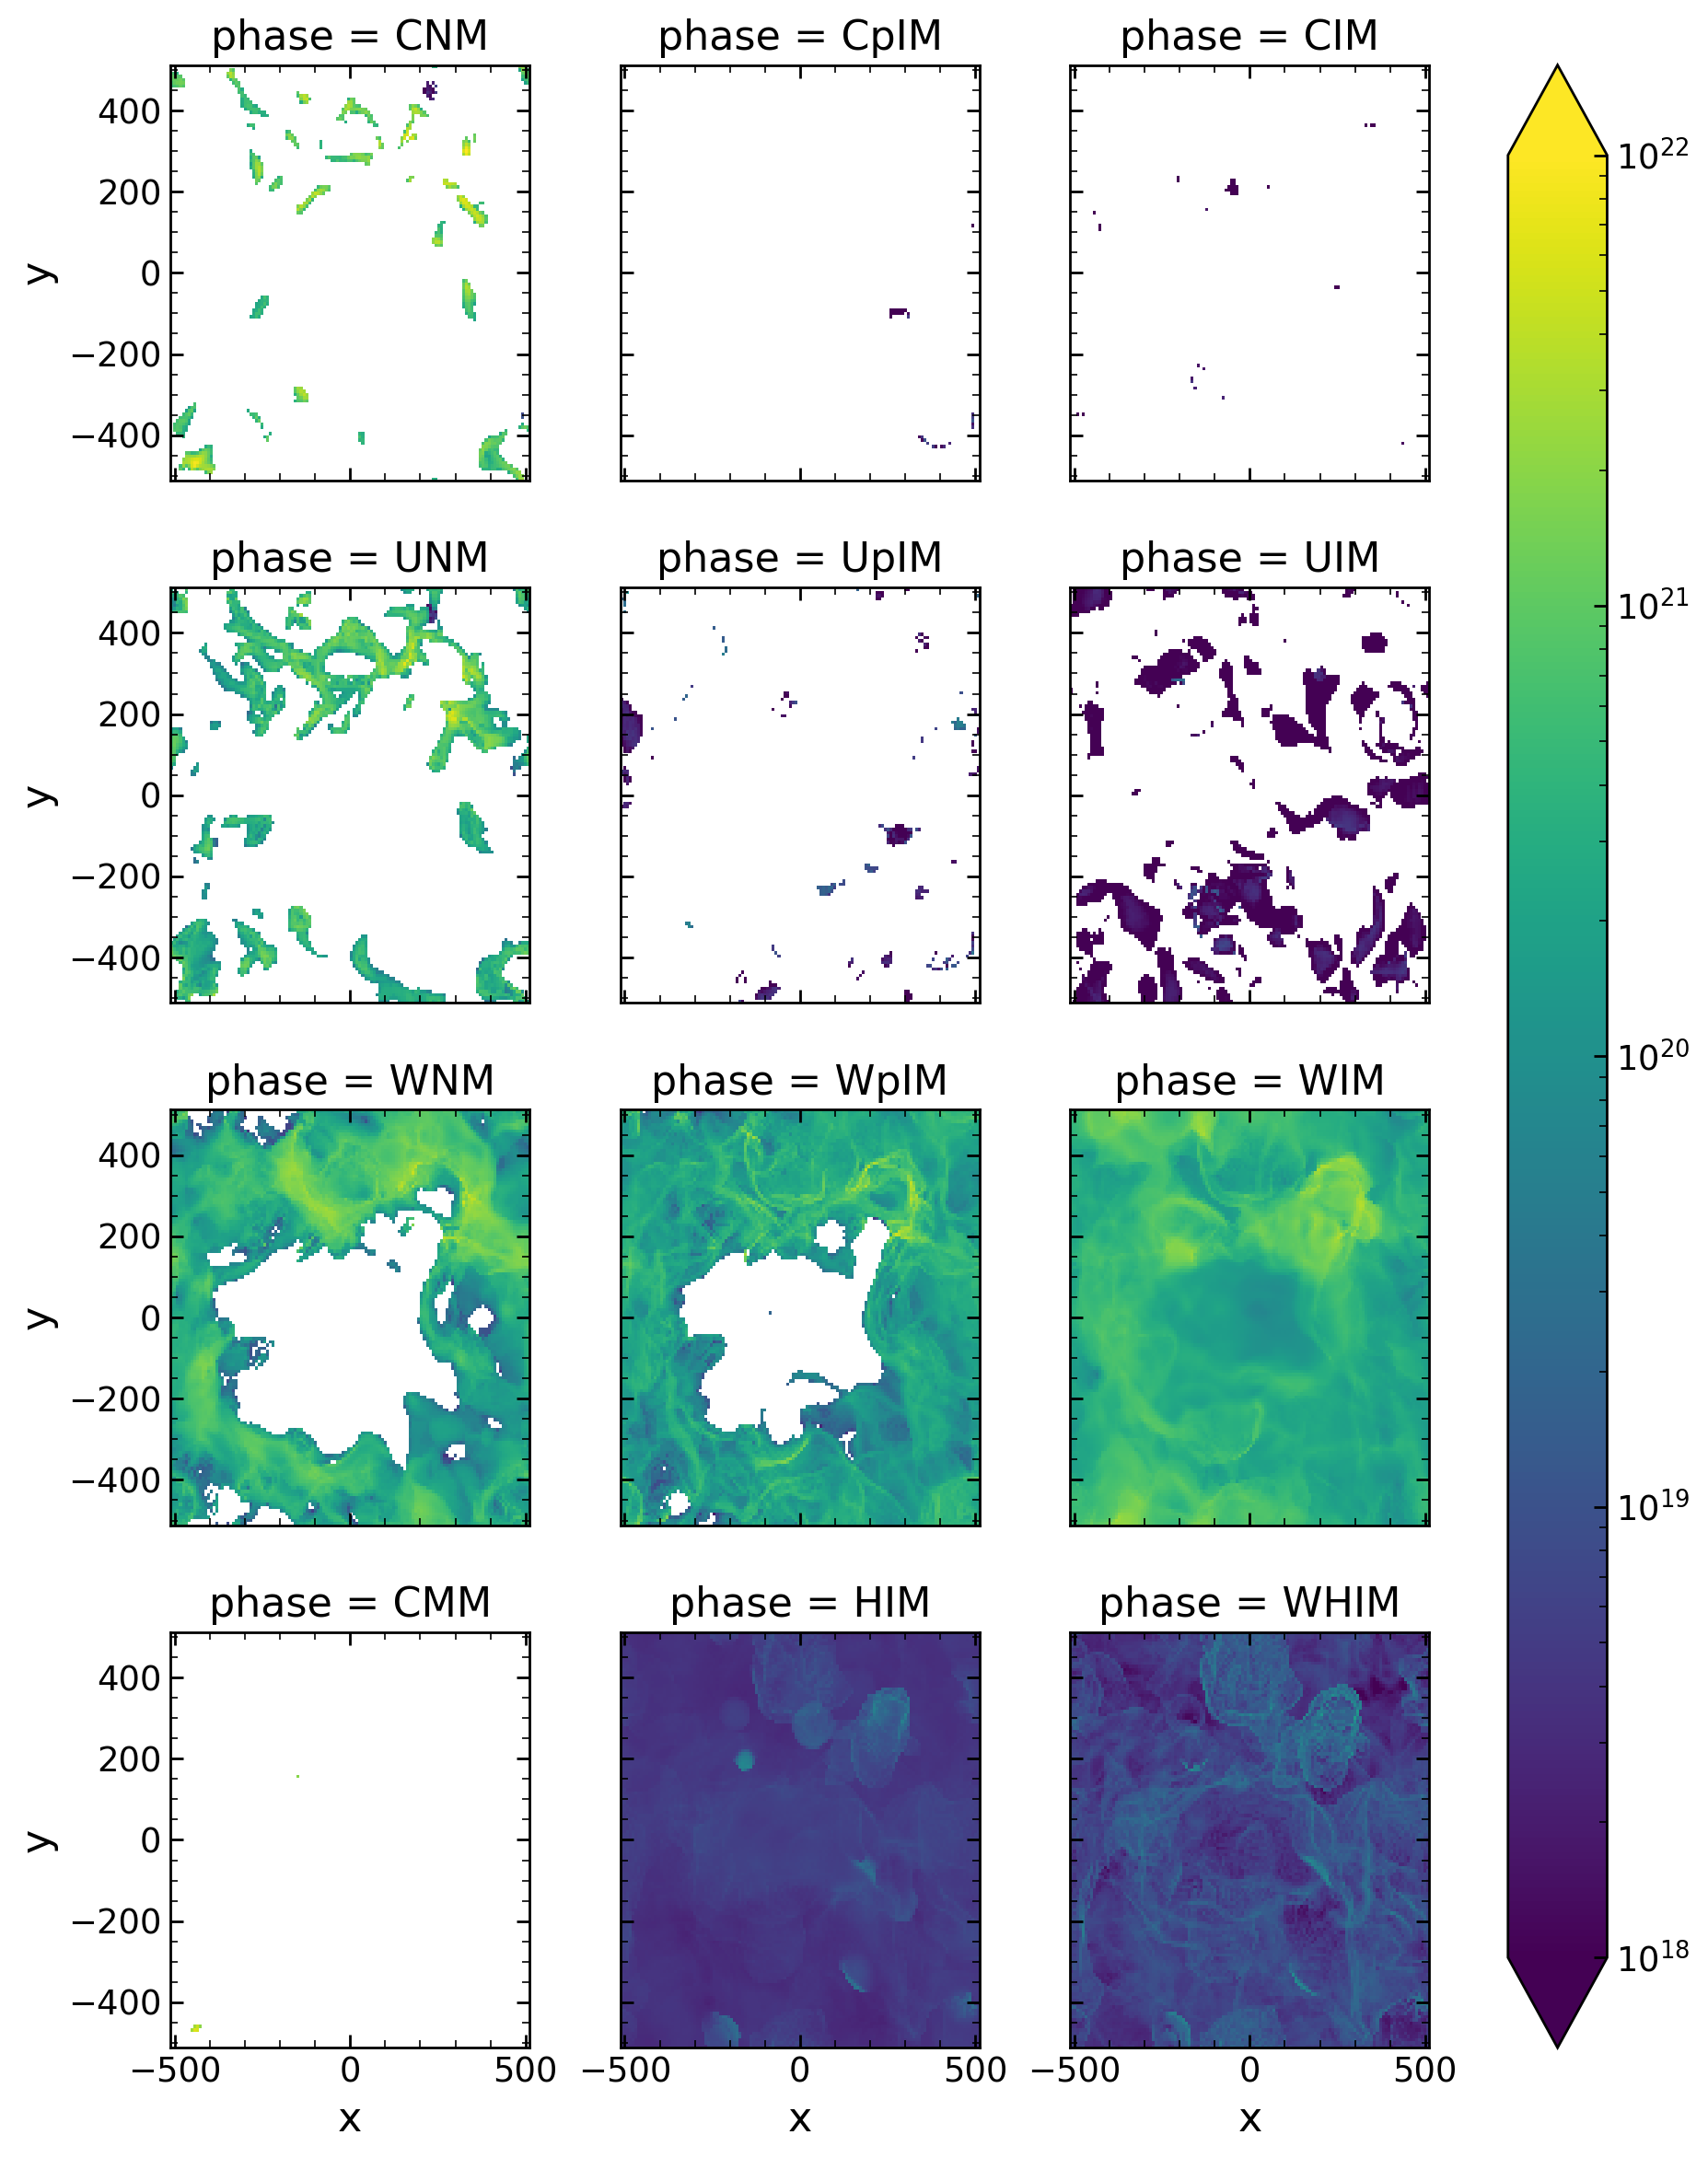

In [258]:
NH.plot(col='phase',col_wrap=3,norm=LogNorm(1.e18,1.e22))

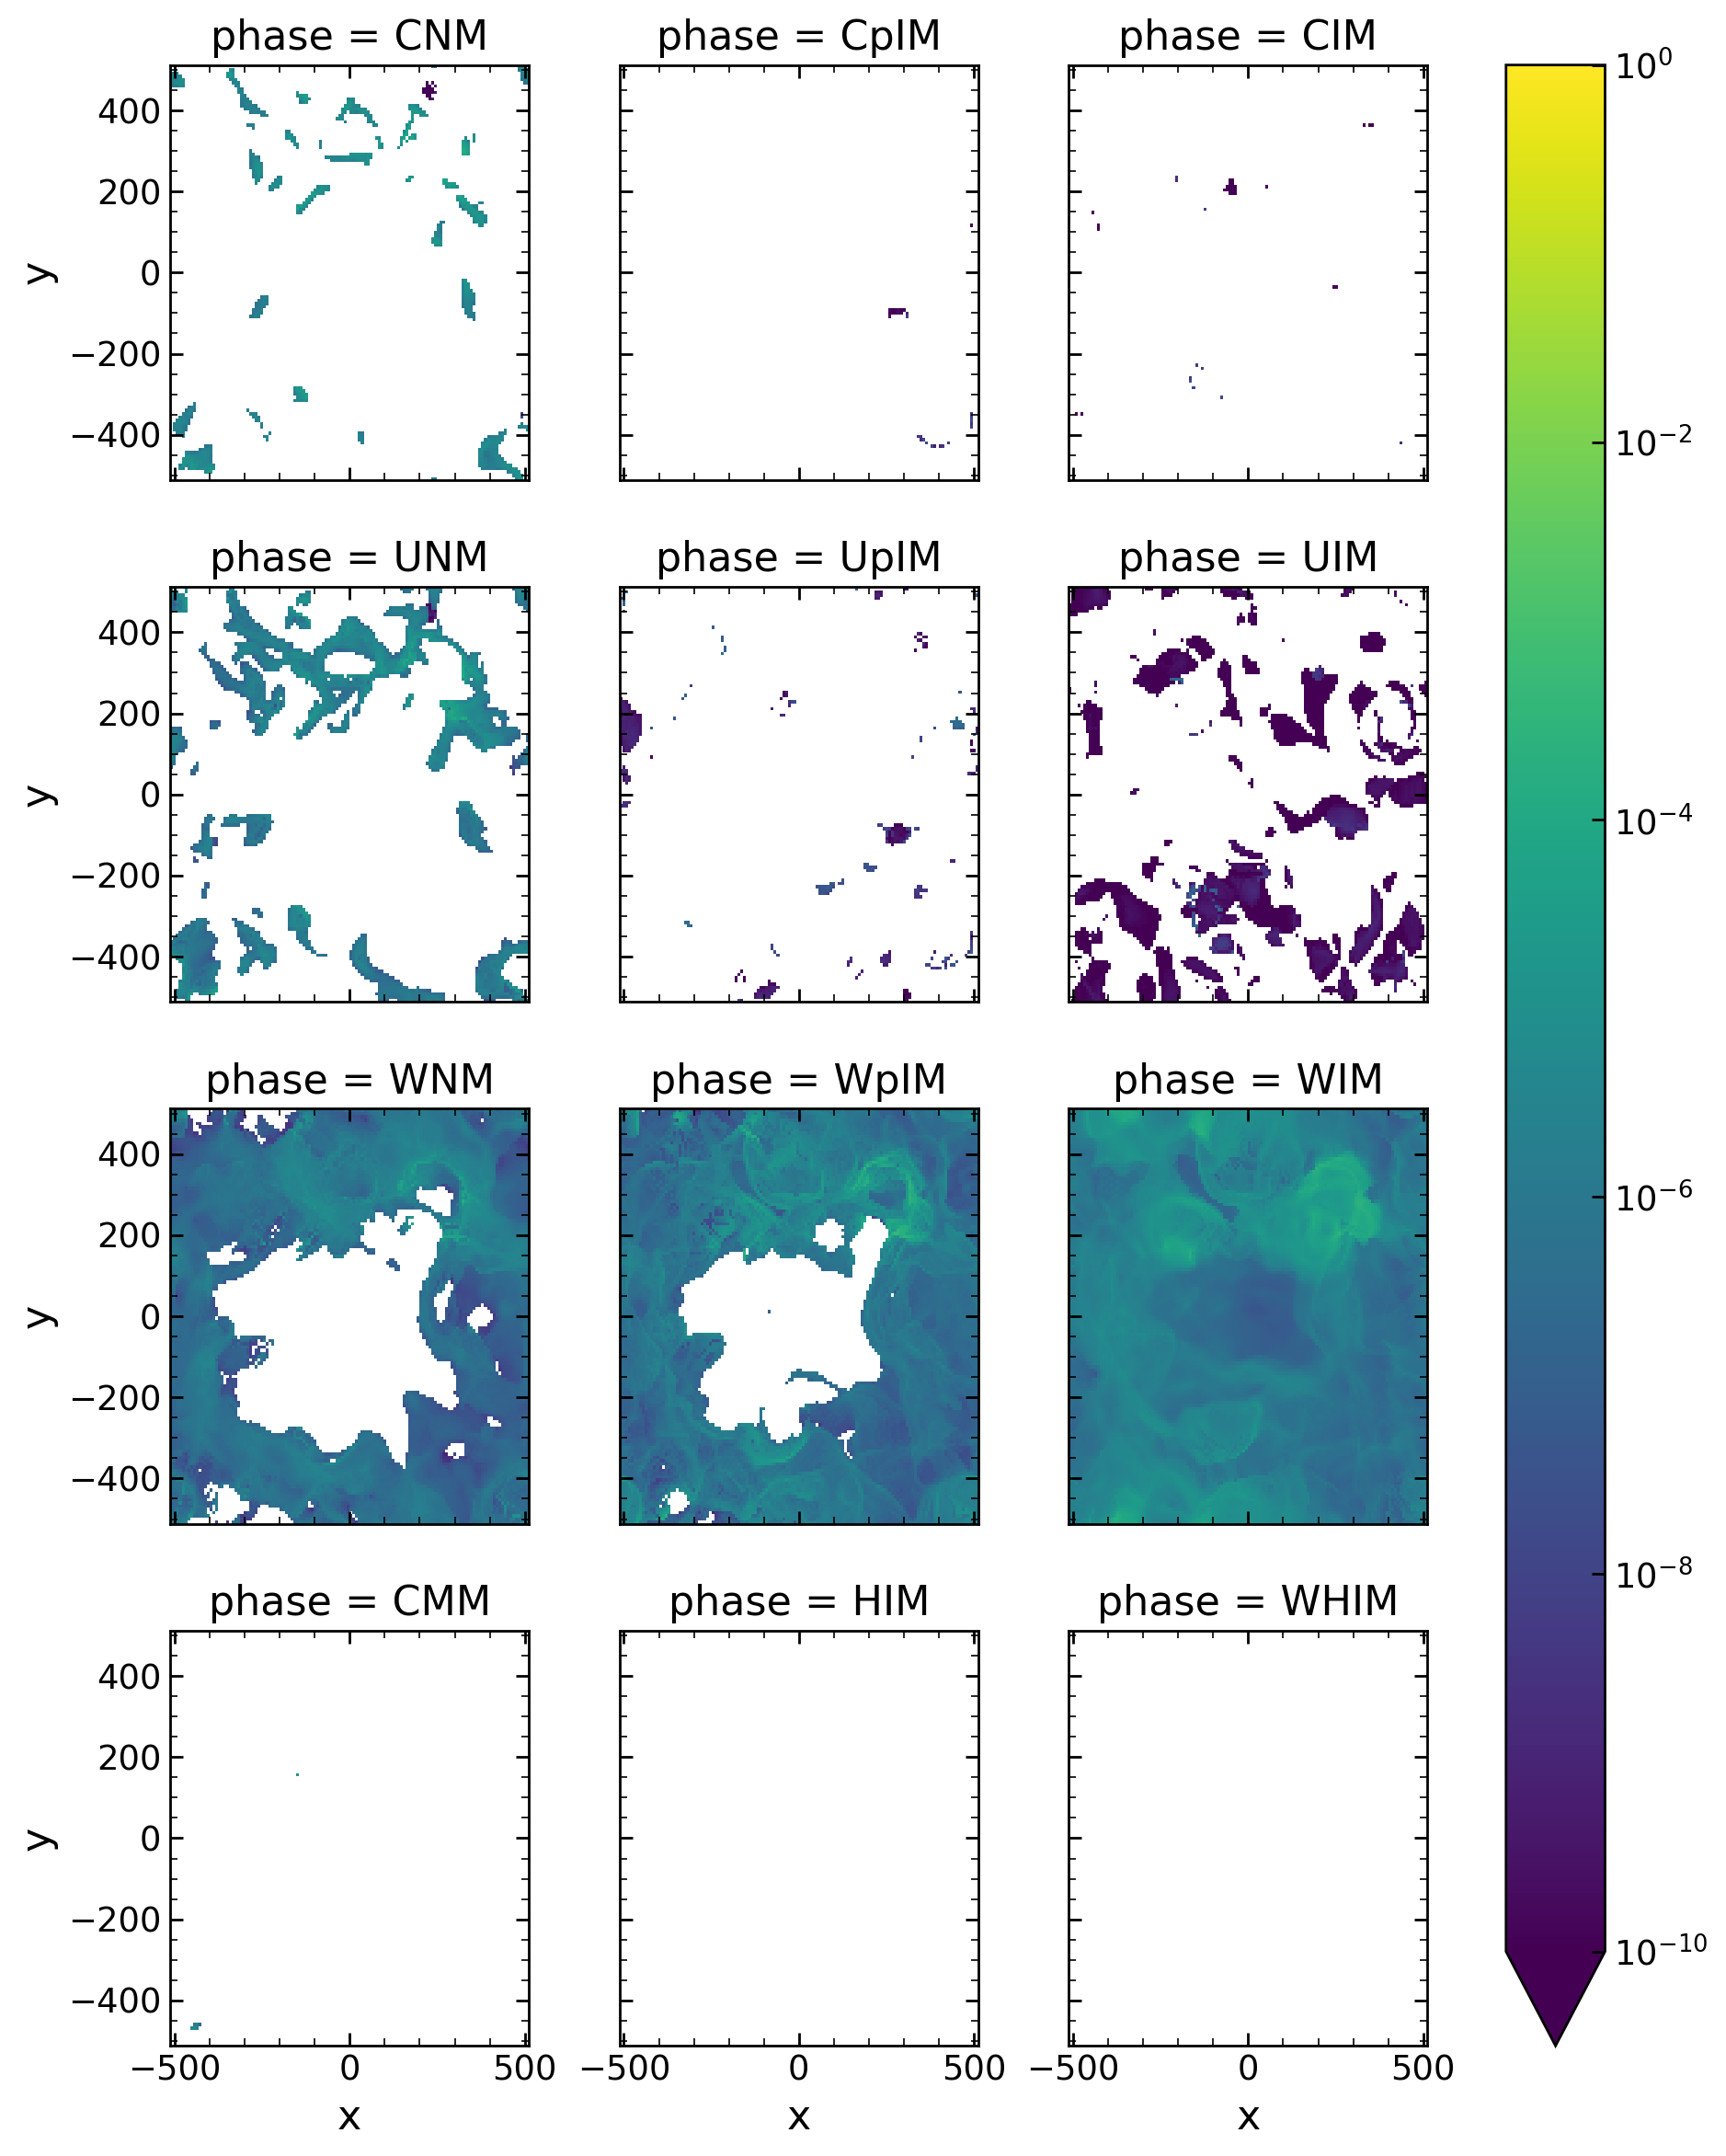

In [259]:
ICII.plot(col='phase',col_wrap=3,norm=LogNorm(1.e-10,1.))

In [ ]:
def get_projections(data,crate,phase):
    NH = xr.Dataset()
    for ph in phase:
        NH = data['nH']*phase[ph]

In [35]:
weights = xr.Dataset()
weights['CII'] = crate['CII']
weights['OI'] = crate['OI']
weights['nH'] = data['nH']
weights['nHsq'] = data['nH']**2

In [50]:
pdf_=get_pdfs('T','xH2',data,weights)

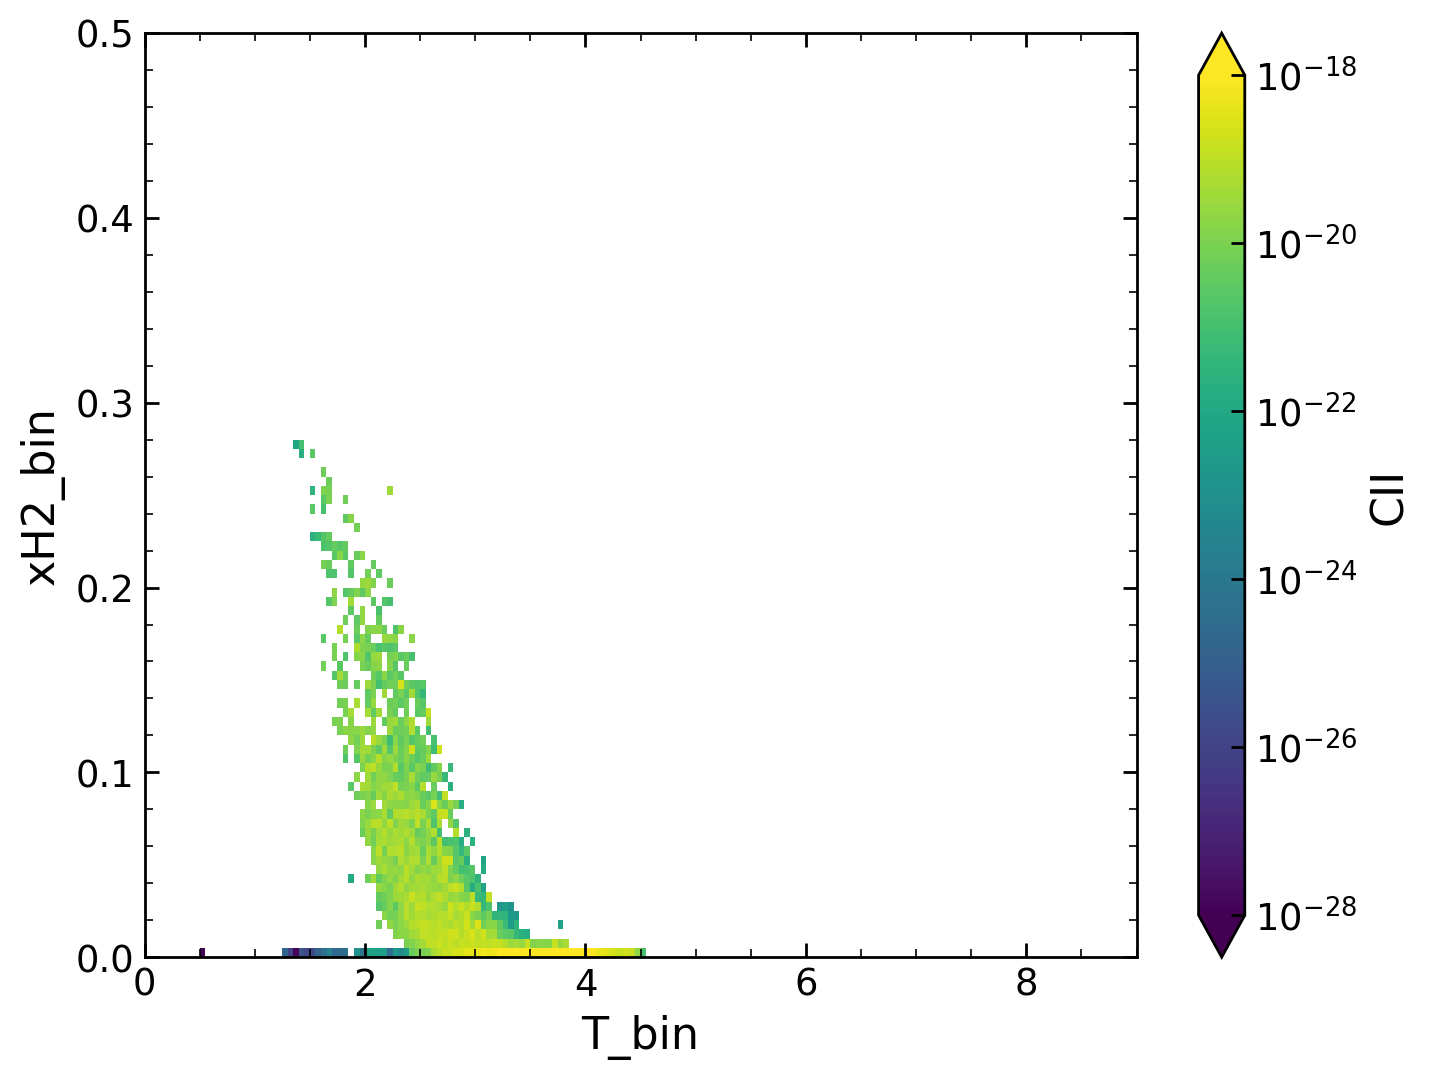

In [51]:
pdf_['CII'].plot(norm=LogNorm(1.e-28,1.e-18))